# Business Problem

# Data Understanding

### Import Libraries

We imported the necessary libraries.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

### Datasets

We uploaded the datasets used for this project. They consist of presidential election results by congressional district from 1952-2020, as well as several components of the 2020 U.S. Census.

In [2]:
#upload presidential election dataset and look at sample rows
election_df = pd.read_csv("combined_1952-2020.csv")
election_df.head()

,year,district,d_percent,r_percent,other_percent,total_votes
0,1952,AL-01,57.76,42.24,0.0,45915.0
1,1952,AL-02,63.19,36.81,0.0,48972.0
2,1952,AL-03,72.23,27.77,0.0,36062.0
3,1952,AL-04,64.14,35.86,0.0,41456.0
4,1952,AL-05,72.69,27.31,0.0,55867.0


In [3]:
#upload census education dataset and look at sample rows
education_df = pd.read_csv("Education.csv")
education_df.head()

,Year,cd,Bachelors_degree_or_higher,high_school_or_some_degree,Less_than_high_school_graduate
0,2020,0_AK,121098,309698,33572
1,2020,0_DC,277816,177505,34652
2,2020,0_DE,175338,351177,57053
3,2020,0_ND,137958,303148,26631
4,2020,0_PR,121098,309698,33572


In [4]:
#upload census finances dataset and look at sample rows
finance_df = pd.read_csv("Finance.csv")
finance_df.head()

,Year,cd,Less_than_$5000,$5000_to_$9999,$10000_to_$14999,$15000_to_$19999,$20000_to_$24999,$25000_to_$34999,$35000_to_$49999,$50000_to_$74999,$75000_to_$99999,$100000_to_$149999,$150000_or_more
0,2019,0_AK,5746,4600,7294,8276,8110,17476,26315,44593,35414,49254,46182
1,2019,0_DC,14138,10318,12304,9470,7695,16841,21906,34694,30240,46707,80073
2,2019,0_DE,11281,7942,12874,12469,14976,31208,43421,64673,52472,60199,52984
3,2019,0_ND,9110,9039,12923,13021,12824,27603,38832,57179,45844,54543,38625
4,2019,0_PR,181287,141265,140140,122766,94982,145595,141659,119535,49486,33679,21805


In [5]:
#upload census job industry dataset and look at sample rows
industry_df = pd.read_csv("Industry.csv")
industry_df.head()

,Year,cd,Total_Agriculture_forestry_fishing_hunting_mining,Total_Construction,Total_Manufacturing,Total_Wholesale_trade,Total_Retail_trade,Total_Transportation_warehousing_utilities,Total_Information,Total_Finance_insurance_realestate_rental_leasing,...,Female_Wholesale_trade,Female_Retail_trade,Female_Transportation_warehousing_utilities,Female_Information,Female_Finance_insurance_realestate_rental_leasing,Female_Professional_scientific_management_administrative_waste_management_services,Female_Educationalservices_healthcare_socialassistance,Female_Arts_entertainment_recreation_accommodation_foodservices,Female_Otherservices_except_Public_administration,Female_Public_administration
0,2019,0_PR,6239,33555,73692,23153,70787,29104,12717,46604,...,6012,29811,6283,4613,27197,22920,120146,16304,9342,35707
1,2019,1_MA,1612,16225,37577,8364,25590,15131,4228,22218,...,2188,10088,3248,1727,12659,8124,51768,6292,4436,5532
2,2019,2_MA,1294,14207,32599,6414,20952,9529,6162,17239,...,1929,7766,1660,2253,8629,10494,44123,5242,4462,4097
3,2019,3_MA,541,18000,48852,7105,22137,11373,7342,17442,...,2058,8157,2782,2565,8799,13879,43803,6227,5280,4607
4,2019,4_MA,590,19548,36590,10322,27693,11294,7526,30364,...,2556,11035,2645,2841,13022,17985,53630,6214,5104,5422


## Data Inspection

In this section, we inspected our datasets. Inspection included checking for missing and duplicate values, inspecting the shape and distribution of data, and renaming columns for smoother manipulation.  

In [6]:
#look at the Dtypes of columns in the datasets and check for missing values
print("Election Dataset Details: ")
print(election_df.info())
print('\n')
print("Education Census Dataset Details: ")
print(education_df.info())
print('\n')
print("Finance Census Dataset Details: ")
print(finance_df.info())
print('\n')
print("Industry Census Dataset Details: ")
print(industry_df.info())

Election Dataset Details: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7838 non-null   int64  
 1   district       7838 non-null   object 
 2   d_percent      7838 non-null   float64
 3   r_percent      7838 non-null   float64
 4   other_percent  7838 non-null   float64
 5   total_votes    7263 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 367.5+ KB
None


Education Census Dataset Details: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Year                            874 non-null    int64 
 1   cd                              874 non-null    object
 2   Bachelors_degree_or_higher      874 non-null    int64 
 3   

In [7]:
#look at sample rows of the election dataset where the total_votes value is null
election_df[election_df.total_votes.isnull()].head(50)

,year,district,d_percent,r_percent,other_percent,total_votes
887,1960,CA-04,51.15,48.85,0.0,NaN
888,1960,CA-05,67.71,32.29,0.0,NaN
890,1960,CA-07,52.83,47.17,0.0,NaN
891,1960,CA-08,55.07,44.93,0.0,NaN
898,1960,CA-15,55.23,44.77,0.0,NaN
899,1960,CA-16,44.24,55.76,0.0,NaN
900,1960,CA-17,52.25,47.75,0.0,NaN
901,1960,CA-18,46.80,53.20,0.0,NaN
902,1960,CA-19,65.58,34.42,0.0,NaN
903,1960,CA-20,33.10,66.90,0.0,NaN


In [8]:
#look at sample rows of a California district before and after the years in which total_votes is null
print(election_df[(election_df.year == 1956) & (election_df.district == 'CA-04')])
print(election_df[(election_df.year == 1968) & (election_df.district == 'CA-04')])

     year district  d_percent  r_percent  other_percent  total_votes
453  1956    CA-04      40.49      59.51            0.0     192882.0
      year district  d_percent  r_percent  other_percent  total_votes
1754  1968    CA-04      46.81      43.39            9.8     161715.0


### Fill Missing Values 

Upon inspection, the decision was made to fill in the missing values of the 'total_votes' column which the the mean of the total votes taken in the immediate elections before and after the years in which the value is null.

In [9]:
# Calculate the mean of 'total_votes' for years 1956 and 1968 for each district
avg_total_votes = election_df[election_df.year.isin([1956, 1968])].groupby('district')['total_votes'].mean()

# Fill the null values in 'total_votes' column with the corresponding average for each district
election_df['total_votes'] = election_df.apply(lambda row: avg_total_votes[row['district']] if (pd.isnull(row['total_votes']) and row['district'] in avg_total_votes) else row['total_votes'], axis=1)

In [10]:
#ensure the method of filling in the mean worked properly
election_df[(election_df.year == 1960) & (election_df.district.str.startswith('CA'))]

,year,district,d_percent,r_percent,other_percent,total_votes
884,1960,CA-01,46.62,53.38,0.0,228484.0
885,1960,CA-02,52.81,47.19,0.0,174885.0
886,1960,CA-03,54.69,45.31,0.0,250686.0
887,1960,CA-04,51.15,48.85,0.0,177298.5
888,1960,CA-05,67.71,32.29,0.0,139285.5
889,1960,CA-06,54.20,45.80,0.0,222849.0
890,1960,CA-07,52.83,47.17,0.0,153033.5
891,1960,CA-08,55.07,44.93,0.0,191890.0
892,1960,CA-09,48.16,51.84,0.0,201724.0
893,1960,CA-10,46.22,53.78,0.0,296851.0


In [11]:
#look at the info of the election dataset again to check if any null values remain
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7838 non-null   int64  
 1   district       7838 non-null   object 
 2   d_percent      7838 non-null   float64
 3   r_percent      7838 non-null   float64
 4   other_percent  7838 non-null   float64
 5   total_votes    7836 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 367.5+ KB


In [12]:
#drop the two missing values' rows
election_df.dropna(subset=['total_votes'], inplace=True)

In [13]:
#inspect the info of the election dataset one more time
election_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7836 entries, 0 to 7837
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7836 non-null   int64  
 1   district       7836 non-null   object 
 2   d_percent      7836 non-null   float64
 3   r_percent      7836 non-null   float64
 4   other_percent  7836 non-null   float64
 5   total_votes    7836 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 428.5+ KB


### Duplicates 

We checked for duplicate rows across the four datasets, but did not find any. 

In [14]:
#check for duplicate rows
election_df.duplicated().any()

False

In [15]:
#check for duplicate rows amongst the other datasets
print("industry_df:")
if industry_df.duplicated().any():
    print("Duplicates found")
else:
    print("No duplicates found")
print("finance_df:")
if finance_df.duplicated().any():
    print("Duplicates found")
else:
    print("No duplicates found")
print("education_df:")
if education_df.duplicated().any():
    print("Duplicates found")
else:
    print("No duplicates found")

industry_df:
No duplicates found
finance_df:
No duplicates found
education_df:
No duplicates found


### Cleaning 

We took a look at the format of the three subsets of the Census dataset, specifying the year 2020 to line up with the presidential election. This led to the decision to rename the columns for the finance dataframe, as well as the values for the 'cd' column in all three dataframes, for easier processing.

In [16]:
#look at sample rows of industry_df
industry_df[industry_df.Year == 2020].head(10)

,Year,cd,Total_Agriculture_forestry_fishing_hunting_mining,Total_Construction,Total_Manufacturing,Total_Wholesale_trade,Total_Retail_trade,Total_Transportation_warehousing_utilities,Total_Information,Total_Finance_insurance_realestate_rental_leasing,...,Female_Wholesale_trade,Female_Retail_trade,Female_Transportation_warehousing_utilities,Female_Information,Female_Finance_insurance_realestate_rental_leasing,Female_Professional_scientific_management_administrative_waste_management_services,Female_Educationalservices_healthcare_socialassistance,Female_Arts_entertainment_recreation_accommodation_foodservices,Female_Otherservices_except_Public_administration,Female_Public_administration
437,2020,0_PR,5799,33585,73286,23297,70781,29351,12979,45821,...,5662,30674,6086,5011,26955,22692,118699,15752,9237,35658
438,2020,1_MA,1506,16353,36777,8478,24727,15734,3791,21262,...,2030,10064,3041,1506,12266,8535,52591,5798,4389,6324
439,2020,2_MA,1203,14477,32378,6358,21319,9863,5785,18393,...,2062,8246,1917,2071,8538,11186,44566,4523,4395,4026
440,2020,3_MA,811,18856,49289,7065,21661,12129,7464,17968,...,1757,7859,2988,2825,9269,14555,44320,6369,4989,4750
441,2020,4_MA,821,20180,35927,10720,28082,11244,7159,30831,...,3142,11581,3020,2692,12495,18624,53816,6134,4928,5615
442,2020,5_MA,516,15997,37176,7505,23446,11081,11123,32952,...,2453,9506,1979,4073,14219,30180,61987,8997,6644,6177
443,2020,6_MA,925,16592,31213,6513,20600,10946,7910,23552,...,1984,7820,2399,3401,10827,16095,43234,5975,4769,5174
444,2020,8_MA,643,21913,26762,9287,30087,17846,10777,47724,...,3040,12277,3917,4310,22595,31112,83363,10315,7343,8401
445,2020,9_MA,2229,26629,20201,7465,21940,11210,5681,20533,...,2047,8375,2289,2275,10517,11774,44585,6179,4675,4627
446,2020,7_MA,96,4402,6992,1998,6801,4661,3051,8425,...,433,2573,928,1605,3672,8368,17521,2803,2149,1693


In [17]:
#look at sample rows of finance_df
finance_df[finance_df.Year == 2020].head(10)

,Year,cd,Less_than_$5000,$5000_to_$9999,$10000_to_$14999,$15000_to_$19999,$20000_to_$24999,$25000_to_$34999,$35000_to_$49999,$50000_to_$74999,$75000_to_$99999,$100000_to_$149999,$150000_or_more
437,2020,0_AK,5949,3869,7476,8007,7831,17154,25802,46592,36099,49201,47139
438,2020,0_DC,14227,9856,11315,8300,7315,15997,20898,35788,30691,47177,86743
439,2020,0_DE,11230,7995,13075,11259,14349,33090,43699,66050,51577,63082,56874
440,2020,0_ND,9007,9189,12780,12625,13199,27237,38050,60184,45490,54662,39572
441,2020,0_PR,178865,139225,140660,122422,98327,149667,144417,122747,51495,35001,22464
442,2020,0_SD,8909,9235,14021,13936,15406,33862,46171,64955,49841,51448,32414
443,2020,0_VT,6249,5675,12907,11082,11572,23388,32383,48075,36571,42955,31923
444,2020,0_WY,5405,5522,7731,8990,8139,18540,25746,39009,31622,37003,24211
445,2020,1_AL,10004,9639,13189,14430,11872,26002,34675,44436,30223,33155,23487
446,2020,1_AR,14442,18060,26423,25372,25031,44107,55545,68984,41490,38297,21077


In [18]:
#get the current column names
finance_current_columns = finance_df.columns.tolist()

#create a dictionary to map the new names to the old names
finance_new_columns = {
    finance_current_columns[3]: "$5000_to_9999",
    finance_current_columns[4]: "$10000_to_14999",
    finance_current_columns[5]: "$15000_to_19999",
    finance_current_columns[6]: "$20000_to_24999",
    finance_current_columns[7]: "$25000_to_34999",
    finance_current_columns[8]: "$35000_to_49999",
    finance_current_columns[9]: "$50000_to_74999",
    finance_current_columns[10]: "$75000_to_99999",
    finance_current_columns[11]: "$100000_to_149999"
}

#rename the columns using the dictionary
finance_df.rename(columns=finance_new_columns, inplace=True)

In [19]:
#look at sample rows of finance_df again to make sure the changes are correct
finance_df[finance_df.Year == 2020].head(10)

,Year,cd,Less_than_$5000,$5000_to_9999,$10000_to_14999,$15000_to_19999,$20000_to_24999,$25000_to_34999,$35000_to_49999,$50000_to_74999,$75000_to_99999,$100000_to_149999,$150000_or_more
437,2020,0_AK,5949,3869,7476,8007,7831,17154,25802,46592,36099,49201,47139
438,2020,0_DC,14227,9856,11315,8300,7315,15997,20898,35788,30691,47177,86743
439,2020,0_DE,11230,7995,13075,11259,14349,33090,43699,66050,51577,63082,56874
440,2020,0_ND,9007,9189,12780,12625,13199,27237,38050,60184,45490,54662,39572
441,2020,0_PR,178865,139225,140660,122422,98327,149667,144417,122747,51495,35001,22464
442,2020,0_SD,8909,9235,14021,13936,15406,33862,46171,64955,49841,51448,32414
443,2020,0_VT,6249,5675,12907,11082,11572,23388,32383,48075,36571,42955,31923
444,2020,0_WY,5405,5522,7731,8990,8139,18540,25746,39009,31622,37003,24211
445,2020,1_AL,10004,9639,13189,14430,11872,26002,34675,44436,30223,33155,23487
446,2020,1_AR,14442,18060,26423,25372,25031,44107,55545,68984,41490,38297,21077


In [20]:
#extract values from 'district_number' and 'state_code' into new 'cd' column
education_df[['district_number', 'state_code']] = education_df['cd'].str.split('_', expand=True)

#reformat 'cd' values to match 'district' values in election_df
education_df['cd'] = education_df['cd'].str.split('_').apply(lambda x: x[1] + '-' + x[0].zfill(2) if len(x) == 2 else x[0])

#view sample rows to inspect changes
education_df[education_df.Year == 2020].head(10)

,Year,cd,Bachelors_degree_or_higher,high_school_or_some_degree,Less_than_high_school_graduate,district_number,state_code
0,2020,AK-00,121098,309698,33572,0,AK
1,2020,DC-00,277816,177505,34652,0,DC
2,2020,DE-00,175338,351177,57053,0,DE
3,2020,ND-00,137958,303148,26631,0,ND
4,2020,PR-00,121098,309698,33572,0,PR
5,2020,SD-00,140300,324334,41808,0,SD
6,2020,VT-00,138230,224524,25013,0,VT
7,2020,WY-00,81191,217060,22529,0,WY
8,2020,AL-01,96025,250831,44764,1,AL
9,2020,AR-01,95999,398584,69560,1,AR


In [21]:
#extract values from 'district_number' and 'state_code' into new 'cd' column
industry_df[['district_number', 'state_code']] = industry_df['cd'].str.split('_', expand=True)

#reformat 'cd' values to match 'district' values in election_df
industry_df['cd'] = industry_df['cd'].str.split('_').apply(lambda x: x[1] + '-' + x[0].zfill(2) if len(x) == 2 else x[0])

#view sample rows to inspect changes
industry_df[industry_df.Year == 2020].head(10)

,Year,cd,Total_Agriculture_forestry_fishing_hunting_mining,Total_Construction,Total_Manufacturing,Total_Wholesale_trade,Total_Retail_trade,Total_Transportation_warehousing_utilities,Total_Information,Total_Finance_insurance_realestate_rental_leasing,...,Female_Transportation_warehousing_utilities,Female_Information,Female_Finance_insurance_realestate_rental_leasing,Female_Professional_scientific_management_administrative_waste_management_services,Female_Educationalservices_healthcare_socialassistance,Female_Arts_entertainment_recreation_accommodation_foodservices,Female_Otherservices_except_Public_administration,Female_Public_administration,district_number,state_code
437,2020,PR-00,5799,33585,73286,23297,70781,29351,12979,45821,...,6086,5011,26955,22692,118699,15752,9237,35658,0,PR
438,2020,MA-01,1506,16353,36777,8478,24727,15734,3791,21262,...,3041,1506,12266,8535,52591,5798,4389,6324,1,MA
439,2020,MA-02,1203,14477,32378,6358,21319,9863,5785,18393,...,1917,2071,8538,11186,44566,4523,4395,4026,2,MA
440,2020,MA-03,811,18856,49289,7065,21661,12129,7464,17968,...,2988,2825,9269,14555,44320,6369,4989,4750,3,MA
441,2020,MA-04,821,20180,35927,10720,28082,11244,7159,30831,...,3020,2692,12495,18624,53816,6134,4928,5615,4,MA
442,2020,MA-05,516,15997,37176,7505,23446,11081,11123,32952,...,1979,4073,14219,30180,61987,8997,6644,6177,5,MA
443,2020,MA-06,925,16592,31213,6513,20600,10946,7910,23552,...,2399,3401,10827,16095,43234,5975,4769,5174,6,MA
444,2020,MA-08,643,21913,26762,9287,30087,17846,10777,47724,...,3917,4310,22595,31112,83363,10315,7343,8401,8,MA
445,2020,MA-09,2229,26629,20201,7465,21940,11210,5681,20533,...,2289,2275,10517,11774,44585,6179,4675,4627,9,MA
446,2020,MA-07,96,4402,6992,1998,6801,4661,3051,8425,...,928,1605,3672,8368,17521,2803,2149,1693,7,MA


In [22]:
#extract values from 'district_number' and 'state_code' into new 'cd' column
finance_df[['district_number', 'state_code']] = finance_df['cd'].str.split('_', expand=True)

#reformat 'cd' values to match 'district' values in election_df
finance_df['cd'] = finance_df['cd'].str.split('_').apply(lambda x: x[1] + '-' + x[0].zfill(2) if len(x) == 2 else x[0])

#view sample rows to inspect changes
finance_df[finance_df.Year == 2020].head(10)

,Year,cd,Less_than_$5000,$5000_to_9999,$10000_to_14999,$15000_to_19999,$20000_to_24999,$25000_to_34999,$35000_to_49999,$50000_to_74999,$75000_to_99999,$100000_to_149999,$150000_or_more,district_number,state_code
437,2020,AK-00,5949,3869,7476,8007,7831,17154,25802,46592,36099,49201,47139,0,AK
438,2020,DC-00,14227,9856,11315,8300,7315,15997,20898,35788,30691,47177,86743,0,DC
439,2020,DE-00,11230,7995,13075,11259,14349,33090,43699,66050,51577,63082,56874,0,DE
440,2020,ND-00,9007,9189,12780,12625,13199,27237,38050,60184,45490,54662,39572,0,ND
441,2020,PR-00,178865,139225,140660,122422,98327,149667,144417,122747,51495,35001,22464,0,PR
442,2020,SD-00,8909,9235,14021,13936,15406,33862,46171,64955,49841,51448,32414,0,SD
443,2020,VT-00,6249,5675,12907,11082,11572,23388,32383,48075,36571,42955,31923,0,VT
444,2020,WY-00,5405,5522,7731,8990,8139,18540,25746,39009,31622,37003,24211,0,WY
445,2020,AL-01,10004,9639,13189,14430,11872,26002,34675,44436,30223,33155,23487,1,AL
446,2020,AR-01,14442,18060,26423,25372,25031,44107,55545,68984,41490,38297,21077,1,AR


We then proceeded to drop the 'district_number' and 'state_code' columns from the three census dataframes, no longer needing them since we correctly implemented a new 'cd' column.

In [23]:
#set the columns to drop
columns_to_drop = ['district_number', 'state_code']

#drop the listed columns in each dataframe
education_df.drop(columns_to_drop, axis=1, inplace=True)
finance_df.drop(columns_to_drop, axis=1, inplace=True)
industry_df.drop(columns_to_drop, axis=1, inplace=True)

### Statistical Inspection 

We took a look at the mean and median of our multiple dataframes' columns and found our data to be relatively normal, as there wasn't much of a glaring difference between the mean and median.

In [24]:
education_df.describe()

,Year,Bachelors_degree_or_higher,high_school_or_some_degree,Less_than_high_school_graduate
count,874.000000,874.000000,8.740000e+02,874.000000
mean,2020.500000,145140.191076,2.697666e+05,49555.389016
std,0.500286,80253.572692,1.090870e+05,30658.095659
min,2020.000000,2872.000000,1.260300e+04,2072.000000
25%,2020.000000,92277.500000,1.990038e+05,31810.500000
50%,2020.500000,125552.500000,2.666335e+05,43866.000000
75%,2021.000000,180793.250000,3.409162e+05,58573.250000
max,2021.000000,561182.000000,1.191468e+06,257422.000000


In [25]:
election_df.describe()

,year,d_percent,r_percent,other_percent,total_votes
count,7836.000000,7836.000000,7836.000000,7836.000000,7.836000e+03
mean,1986.041348,48.069067,48.221275,3.709658,2.228772e+05
std,20.741687,14.365822,14.559580,6.931676,9.011810e+04
min,1952.000000,0.000000,3.000000,0.000000,1.856800e+04
25%,1968.000000,37.990000,39.057500,0.000000,1.666750e+05
50%,1988.000000,45.630000,50.125000,1.010000,2.112000e+05
75%,2004.000000,56.610000,58.812500,4.365000,2.724055e+05
max,2020.000000,96.750000,93.440000,73.740000,2.075946e+06


In [26]:
finance_df.describe()

,Year,Less_than_$5000,$5000_to_9999,$10000_to_14999,$15000_to_19999,$20000_to_24999,$25000_to_34999,$35000_to_49999,$50000_to_74999,$75000_to_99999,$100000_to_149999,$150000_or_more
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,2020.000000,9111.082380,7839.620900,11803.873379,11723.336384,12223.723875,24368.577422,33640.344775,48081.289855,35876.700229,44053.581236,44027.474447
std,0.816808,9216.131279,7570.691867,8406.918768,7627.616235,6786.578523,12019.428477,14742.349222,18913.210629,13522.222894,18113.392401,30450.530816
min,2019.000000,64.000000,117.000000,207.000000,161.000000,227.000000,619.000000,989.000000,1454.000000,1404.000000,1315.000000,413.000000
25%,2019.000000,5638.500000,4747.500000,7417.000000,7431.500000,7998.500000,16455.500000,24091.500000,36493.500000,27768.500000,31766.500000,23356.000000
50%,2020.000000,8071.000000,6781.000000,10974.000000,11108.000000,11832.000000,23970.000000,33055.000000,47555.000000,35939.000000,43312.000000,35041.000000
75%,2021.000000,11073.500000,9509.500000,14881.000000,15019.500000,15677.000000,31634.500000,43687.000000,61654.500000,45399.000000,54861.000000,54517.500000
max,2021.000000,181287.000000,141265.000000,140660.000000,122766.000000,98327.000000,151568.000000,144417.000000,127706.000000,76342.000000,115133.000000,231623.000000


In [27]:
industry_df.describe()

,Year,Total_Agriculture_forestry_fishing_hunting_mining,Total_Construction,Total_Manufacturing,Total_Wholesale_trade,Total_Retail_trade,Total_Transportation_warehousing_utilities,Total_Information,Total_Finance_insurance_realestate_rental_leasing,Total_Professional_scientific_management_administrative_waste_management_services,...,Female_Wholesale_trade,Female_Retail_trade,Female_Transportation_warehousing_utilities,Female_Information,Female_Finance_insurance_realestate_rental_leasing,Female_Professional_scientific_management_administrative_waste_management_services,Female_Educationalservices_healthcare_socialassistance,Female_Arts_entertainment_recreation_accommodation_foodservices,Female_Otherservices_except_Public_administration,Female_Public_administration
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,...,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,2020.000000,4570.873379,18285.215866,31023.640732,7630.355454,23782.874142,15247.643021,5428.139588,19548.557590,31234.946606,...,2116.567506,10170.233410,3449.428680,2033.698703,10220.335622,12196.099161,40327.127384,7289.638444,4587.351640,6439.446987
std,0.816808,5731.345391,8559.792516,18942.502118,3801.505670,9758.381081,7709.733348,4498.918795,11231.345049,19611.041081,...,1228.738149,4241.657006,2051.731459,1772.710421,5183.464170,7563.228284,15976.881942,4104.091604,2319.494714,4285.322740
min,2019.000000,57.000000,1225.000000,1097.000000,203.000000,1065.000000,567.000000,67.000000,545.000000,792.000000,...,72.000000,443.000000,81.000000,0.000000,354.000000,223.000000,1369.000000,284.000000,84.000000,75.000000
25%,2019.000000,936.500000,12720.000000,16856.000000,5199.000000,17782.000000,10412.000000,3037.500000,11877.000000,18533.500000,...,1289.000000,7637.500000,2181.500000,1107.000000,6735.000000,7147.500000,30128.000000,5057.500000,3093.000000,3960.500000
50%,2020.000000,2478.000000,17307.000000,28490.000000,6841.000000,22783.000000,13704.000000,4242.000000,16764.000000,25525.000000,...,1829.000000,9723.000000,2978.000000,1630.000000,9159.000000,10154.000000,40291.000000,6487.000000,4228.000000,5450.000000
75%,2021.000000,5769.500000,22595.000000,41640.000000,9438.500000,29374.500000,18562.000000,6415.500000,24495.500000,38740.000000,...,2656.500000,12669.500000,4146.000000,2369.000000,12945.000000,15007.500000,51230.000000,8827.000000,5588.500000,7781.000000
max,2021.000000,49641.000000,59709.000000,116257.000000,24916.000000,74369.000000,51201.000000,47969.000000,71112.000000,126057.000000,...,8548.000000,32623.000000,16699.000000,19425.000000,29256.000000,47166.000000,120213.000000,53079.000000,17319.000000,37435.000000


### Rename and Census Merge
We renamed the 'cd' column to 'district' in our three census dataframes ahead of joining them with our election dataframe for the 2020 election. We then merged the three census dataframes into one titled 'census_df' along the 'district' and 'Year' columns. After that, we capitalized the 'year' column in election_df to match the census_df and merged those together into a new dataframe titled 'political_df', joining them along the 'district' and 'Year' columns to prepare analysis and processing of the 2020 election along with census information by congressional district.

In [28]:
#rename 'cd' to 'district' for each census dataframe
education_df = education_df.rename(columns={'cd': 'district'})
finance_df = finance_df.rename(columns={'cd': 'district'})
industry_df = industry_df.rename(columns={'cd': 'district'})

In [29]:
#merge education_df and finance_df into merged_df
merged_df = pd.merge(education_df, finance_df, on=['district', 'Year'])

#merge merged_df and industry_df into census_df
census_df = pd.merge(merged_df, industry_df, on=['district', 'Year'])

#view sample rows of new census_df
census_df.head()

,Year,district,Bachelors_degree_or_higher,high_school_or_some_degree,Less_than_high_school_graduate,Less_than_$5000,$5000_to_9999,$10000_to_14999,$15000_to_19999,$20000_to_24999,...,Female_Wholesale_trade,Female_Retail_trade,Female_Transportation_warehousing_utilities,Female_Information,Female_Finance_insurance_realestate_rental_leasing,Female_Professional_scientific_management_administrative_waste_management_services,Female_Educationalservices_healthcare_socialassistance,Female_Arts_entertainment_recreation_accommodation_foodservices,Female_Otherservices_except_Public_administration,Female_Public_administration
0,2020,AK-00,121098,309698,33572,5949,3869,7476,8007,7831,...,1192,8599,5645,1726,5924,7889,35809,6225,3715,14619
1,2020,DC-00,277816,177505,34652,14227,9856,11315,8300,7315,...,453,4677,2673,5765,8757,34913,31135,9739,17319,29711
2,2020,DE-00,175338,351177,57053,11230,7995,13075,11259,14349,...,2261,13006,4249,1722,19976,13791,58313,7818,4637,10870
3,2020,ND-00,137958,303148,26631,9007,9189,12780,12625,13199,...,2075,11286,2961,1451,11313,8247,50183,6465,4080,7483
4,2020,PR-00,121098,309698,33572,178865,139225,140660,122422,98327,...,5662,30674,6086,5011,26955,22692,118699,15752,9237,35658


In [30]:
#rename 'year' to 'Year' in election_df
election_df = election_df.rename(columns={'year': 'Year'})

In [31]:
#merge election_df and census_df into political_df
political_df = pd.merge(election_df, census_df, on=['district', 'Year'])

#view sample rows of political_df
political_df.head(10)

,Year,district,d_percent,r_percent,other_percent,total_votes,Bachelors_degree_or_higher,high_school_or_some_degree,Less_than_high_school_graduate,Less_than_$5000,...,Female_Wholesale_trade,Female_Retail_trade,Female_Transportation_warehousing_utilities,Female_Information,Female_Finance_insurance_realestate_rental_leasing,Female_Professional_scientific_management_administrative_waste_management_services,Female_Educationalservices_healthcare_socialassistance,Female_Arts_entertainment_recreation_accommodation_foodservices,Female_Otherservices_except_Public_administration,Female_Public_administration
0,2020,AK-00,42.77,52.83,4.40,359530.0,121098,309698,33572,5949,...,1192,8599,5645,1726,5924,7889,35809,6225,3715,14619
1,2020,AL-01,35.19,63.53,1.28,332777.0,96025,250831,44764,10004,...,1575,10653,2347,889,7997,8812,36343,7015,4551,5038
2,2020,AL-02,34.62,64.16,1.22,307431.0,109032,333132,69141,14763,...,2063,11714,4145,1384,8717,8803,43616,7720,4445,12631
3,2020,AL-03,34.08,64.67,1.25,325631.0,77833,267634,49575,13068,...,1534,8521,2270,1026,7766,5546,34563,4949,3362,4704
4,2020,AL-04,17.87,80.96,1.17,321470.0,69353,295273,67001,9793,...,1510,11044,2952,981,5745,5551,36535,5555,3076,4866
5,2020,AL-05,35.63,62.47,1.90,365610.0,118293,199894,36396,6636,...,1412,7721,1969,1678,4729,11305,27309,4624,2593,7612
6,2020,AL-06,31.42,66.69,1.89,372834.0,200747,369353,60132,14144,...,3053,13288,5694,3285,19878,14576,59392,8865,6104,8078
7,2020,AL-07,70.55,28.31,1.14,298712.0,55728,198658,32083,9456,...,641,5735,1700,561,4647,3102,27145,3563,2410,3648
8,2020,AR-01,27.93,69.06,3.01,271712.0,95999,398584,69560,14442,...,2028,14189,4600,1380,9503,6984,54978,6705,4354,9332
9,2020,AR-02,44.26,53.11,2.63,333347.0,105763,196882,23807,8516,...,1290,7767,2486,2142,7453,7980,37493,4898,3284,5988


### Further Inspection 

With the newly created political_df, we inspected the shape, statistics, and data types.

In [32]:
#look at the size of rows and columns for political_df
political_df.shape

(428, 61)

In [33]:
#look at the statistics for political_df
political_df.describe()

,Year,d_percent,r_percent,other_percent,total_votes,Bachelors_degree_or_higher,high_school_or_some_degree,Less_than_high_school_graduate,Less_than_$5000,$5000_to_9999,...,Female_Wholesale_trade,Female_Retail_trade,Female_Transportation_warehousing_utilities,Female_Information,Female_Finance_insurance_realestate_rental_leasing,Female_Professional_scientific_management_administrative_waste_management_services,Female_Educationalservices_healthcare_socialassistance,Female_Arts_entertainment_recreation_accommodation_foodservices,Female_Otherservices_except_Public_administration,Female_Public_administration
count,428.0,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,...,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,2020.0,51.783949,46.388808,1.827243,362723.539720,142236.946262,269560.934579,49802.439252,8714.186916,7760.390187,...,2115.294393,10124.380841,3465.759346,2028.030374,10198.579439,12171.448598,40353.850467,7296.046729,4591.775701,6382.731308
std,0.0,16.103257,16.097817,0.663849,63667.515241,77057.019154,104820.401211,30235.355092,4569.797438,4456.487793,...,1217.015668,4137.907887,2051.968993,1778.810871,5088.299074,7504.117194,15466.004691,4122.054247,2319.433810,4048.187678
min,2020.0,17.870000,5.400000,0.510000,160781.000000,3006.000000,17403.000000,2183.000000,402.000000,348.000000,...,90.000000,691.000000,227.000000,11.000000,584.000000,600.000000,2087.000000,699.000000,327.000000,160.000000
25%,2020.0,39.867500,34.777500,1.360000,321421.500000,91363.000000,199459.250000,32061.750000,5582.750000,5000.000000,...,1314.750000,7586.250000,2161.750000,1124.500000,6675.500000,7157.500000,30373.750000,5087.000000,3083.750000,3959.250000
50%,2020.0,50.380000,47.900000,1.750000,365196.500000,123555.500000,266633.500000,44259.500000,8019.500000,6940.000000,...,1817.000000,9673.500000,2997.500000,1630.000000,9270.500000,10017.500000,40360.500000,6530.000000,4274.000000,5440.500000
75%,2020.0,63.132500,58.517500,2.180000,407102.000000,176053.750000,340716.750000,58769.000000,11032.250000,9987.750000,...,2657.250000,12591.750000,4166.750000,2364.250000,12740.000000,14828.750000,51174.000000,8916.250000,5574.750000,7769.250000
max,2020.0,92.150000,80.960000,4.540000,528137.000000,476006.000000,664959.000000,208379.000000,27597.000000,30104.000000,...,8541.000000,23951.000000,15673.000000,19425.000000,27831.000000,43936.000000,87146.000000,49770.000000,17319.000000,32732.000000


In [34]:
#look for any categorical columns in political_df
for column in political_df.columns:
    if political_df[column].dtype not in ['float64', 'int64']:
        print(column, political_df[column].dtype)

district object


## Visual Data Analysis
In this section, we plotted graphs and displayed visual analysis of our findings regarding the location of swing districts and trends that can be useful in assessing the reason for certain election results around the country.  

### Election Results by Year

This graph displays each party's percentage of the total vote by election year.

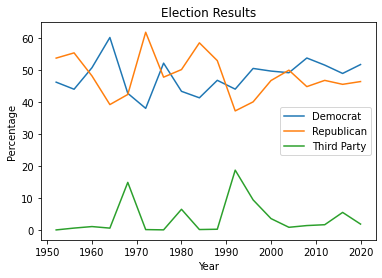

In [35]:
#group the election dataframe results by Year
grouped_df = election_df.groupby('Year').mean().reset_index()

#plot a line graph for each party's results by election year
plt.plot(grouped_df['Year'], grouped_df['d_percent'], label='Democrat')
plt.plot(grouped_df['Year'], grouped_df['r_percent'], label='Republican')
plt.plot(grouped_df['Year'], grouped_df['other_percent'], label='Third Party')

#set labels and titles
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Election Results')
plt.legend()

#display graph
plt.show()

### Election Results by Year and State
This plot displays the parties' percentage of the total vote through the election years, separated by state. 

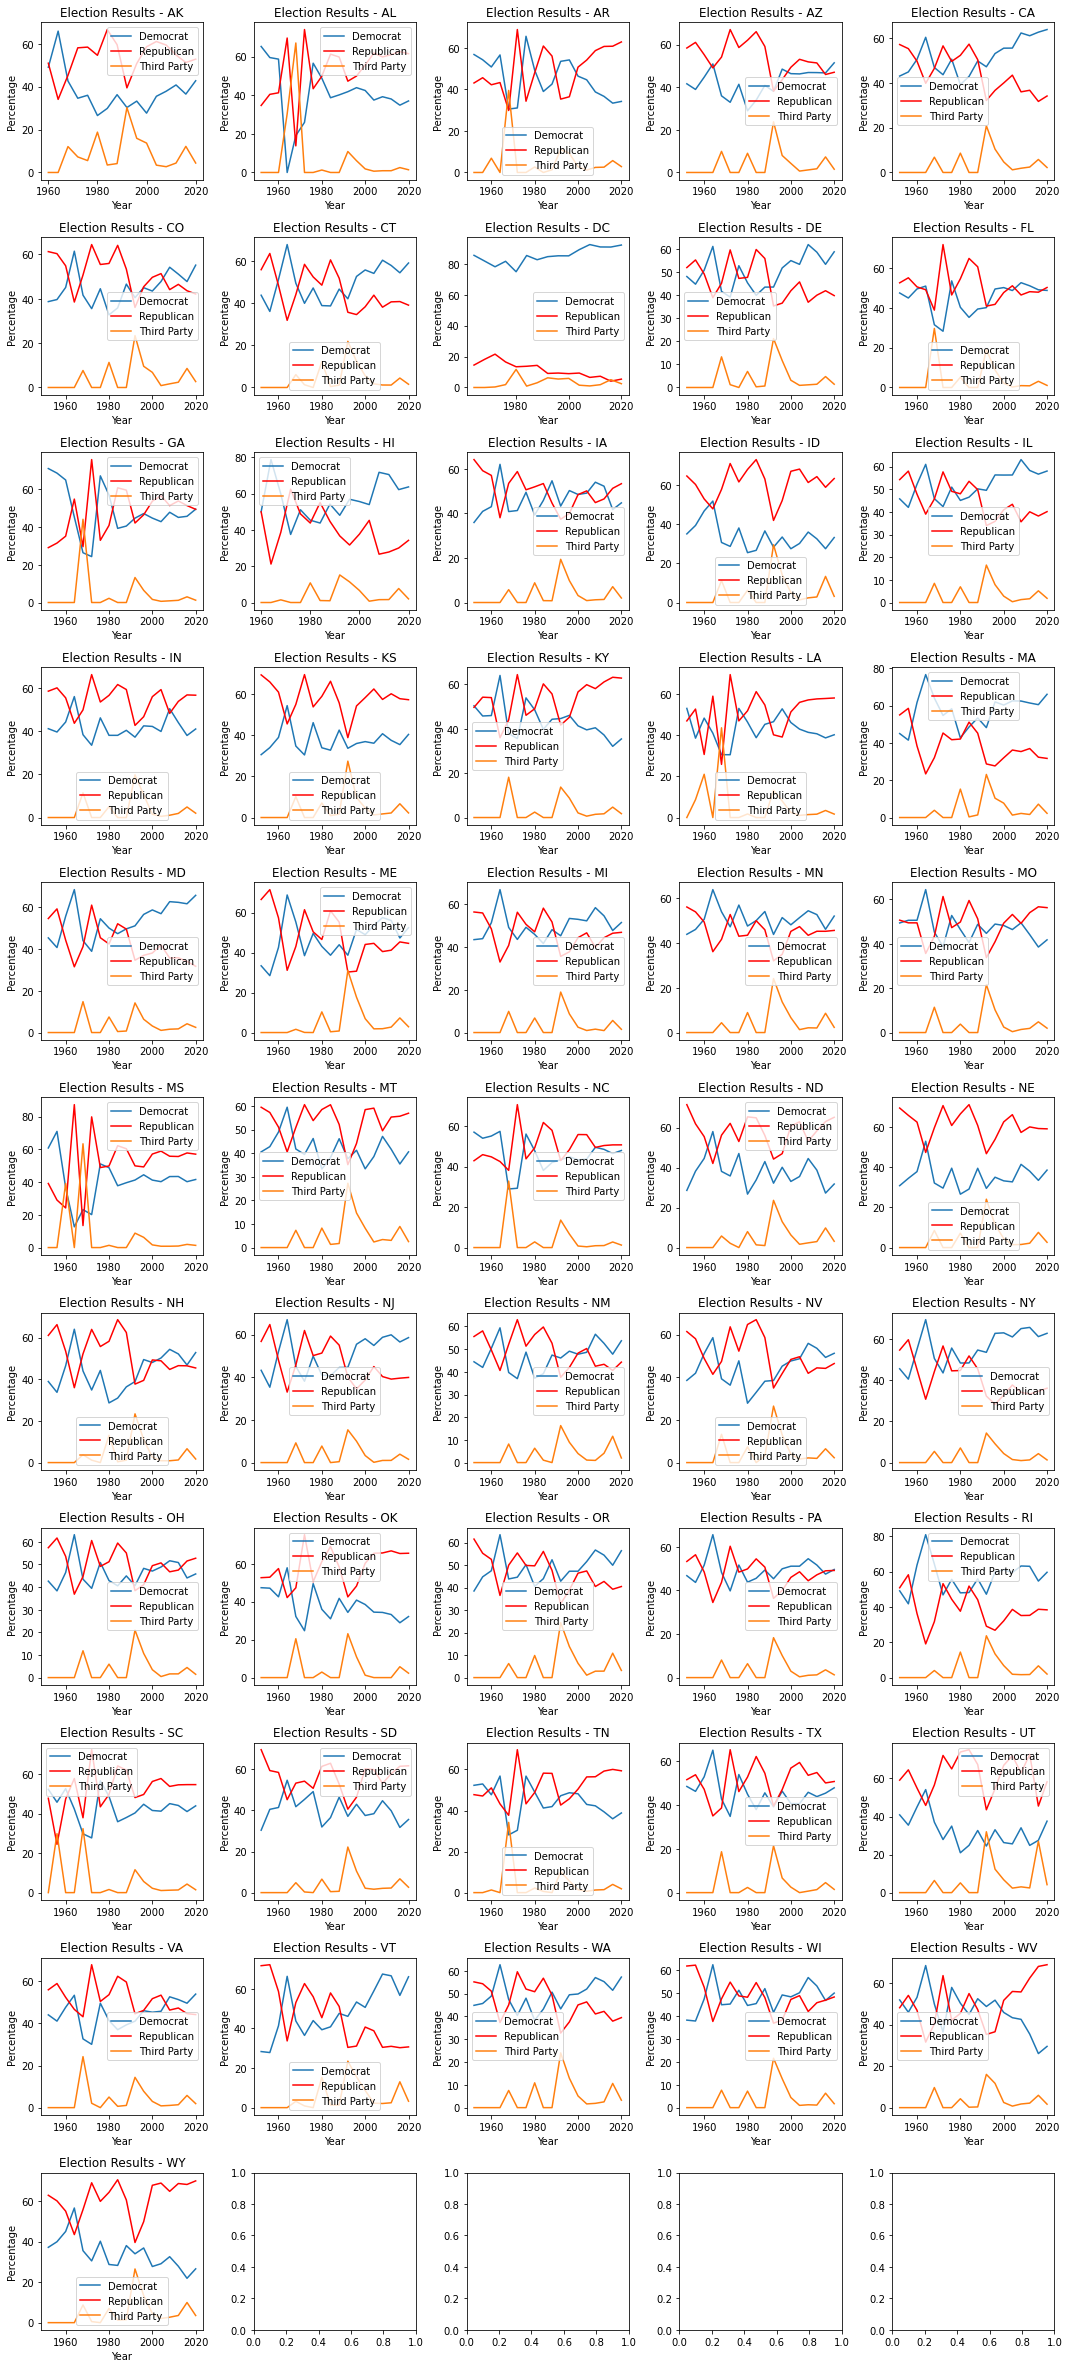

In [36]:
#create a 'state' column in election_df
election_df['state'] = election_df['district'].apply(lambda x: x[:2])

#group by 'state' and 'Year' columns and calculate the mean
grouped_df = election_df.groupby(['state', 'Year']).mean().reset_index()

#get a list of states
states = grouped_df['state'].unique()
num_states = len(states)

#calculate the number of rows and columns for the subplot grid
num_cols = 5
num_rows = (num_states + num_cols - 1) // num_cols

#create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))

#iterate over states and plot on each subplot
for i, state in enumerate(states):
    state_df = grouped_df[grouped_df['state'] == state]

    row = i // num_cols
    col = i % num_cols

    axes[row, col].plot(state_df['Year'], state_df['d_percent'], label='Democrat')
    axes[row, col].plot(state_df['Year'], state_df['r_percent'], label='Republican', color='red')
    axes[row, col].plot(state_df['Year'], state_df['other_percent'], label='Third Party')

    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_title(f'Election Results - {state}')
    axes[row, col].legend()

#display results
plt.tight_layout()
plt.show()

### Data Distribution
This plot shows a distribution of the data by column in our fully merged dataframe. There are relatively normal distributions throughout the dataframe, but some are a bit right skewed, so we proceed to implement normalization tactics.  

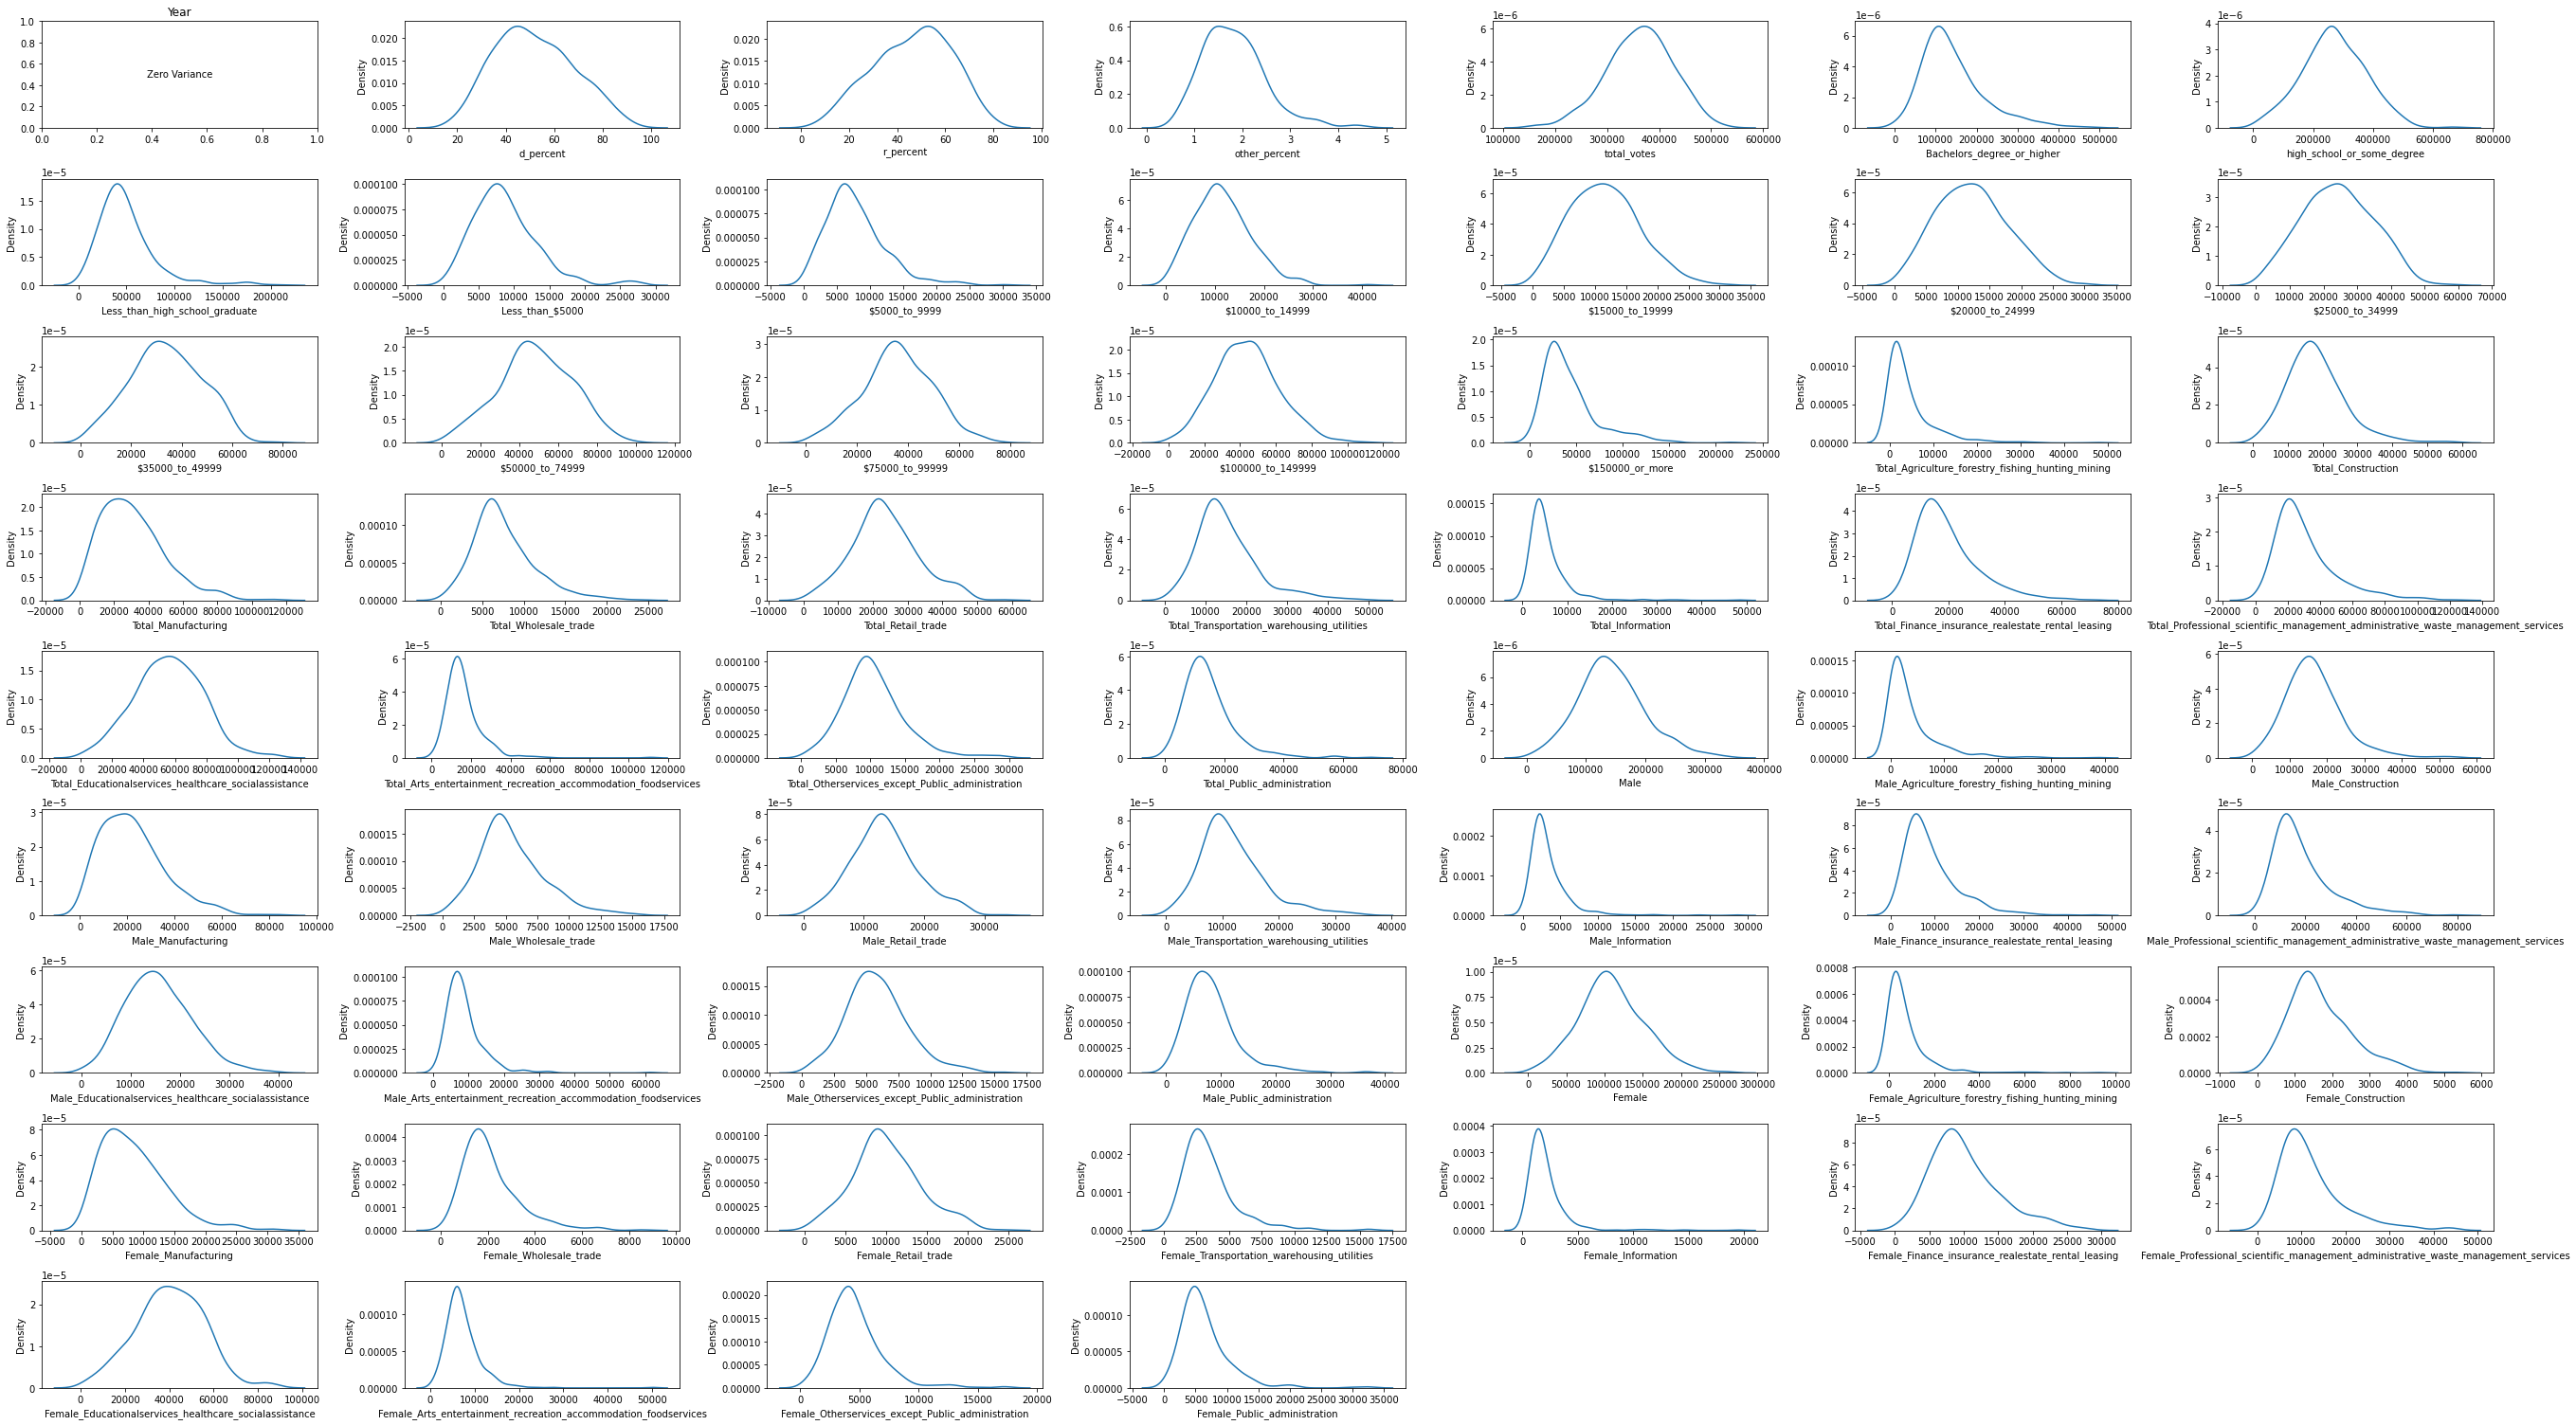

In [37]:
#grab all numeric type columns
numeric_columns = political_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

#calculate the number of rows and columns needed
num_plots = len(numeric_columns)
num_cols = 7
num_rows = math.ceil(num_plots / num_cols)

#set a plot and multiple axes
fig, ax = plt.subplots(num_rows,num_cols,figsize=(37,21))
ax = ax.flatten()

#iterate over the numeric columns and plot distribution curves
for i, j in enumerate(numeric_columns):
    if political_df[j].var() != 0:  #check if the variance is not zero
        sns.kdeplot(political_df[j], ax=ax[i])
    else:
        ax[i].text(0.5, 0.5, 'Zero Variance', ha='center', va='center')
        ax[i].set_title(j)
    
#hide any unused subplots
for i in range(num_plots, len(ax)):
    fig.delaxes(ax[i])

#display results
plt.tight_layout()
plt.show()

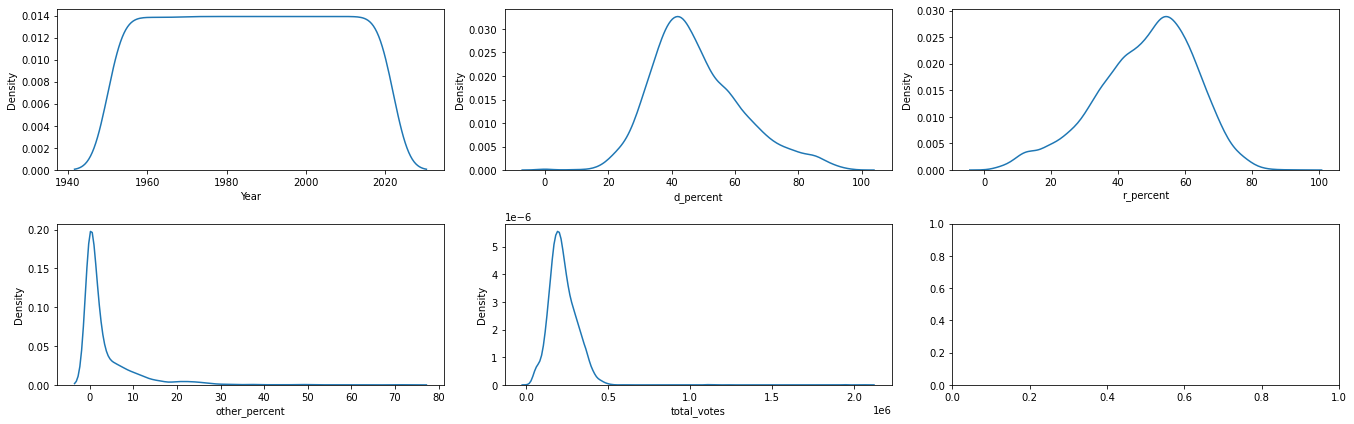

In [38]:
#grab all numeric type columns
election_numeric_columns = election_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

#set a plot and multiple axes
fig, ax = plt.subplots(2,3,figsize=(19,6))
ax = ax.flatten()

#iterate over the numeric columns and plot distribution curves
for i, j in enumerate(election_numeric_columns):
    sns.kdeplot(election_df[j],ax=ax[i]);

#display results
plt.tight_layout()
plt.show()

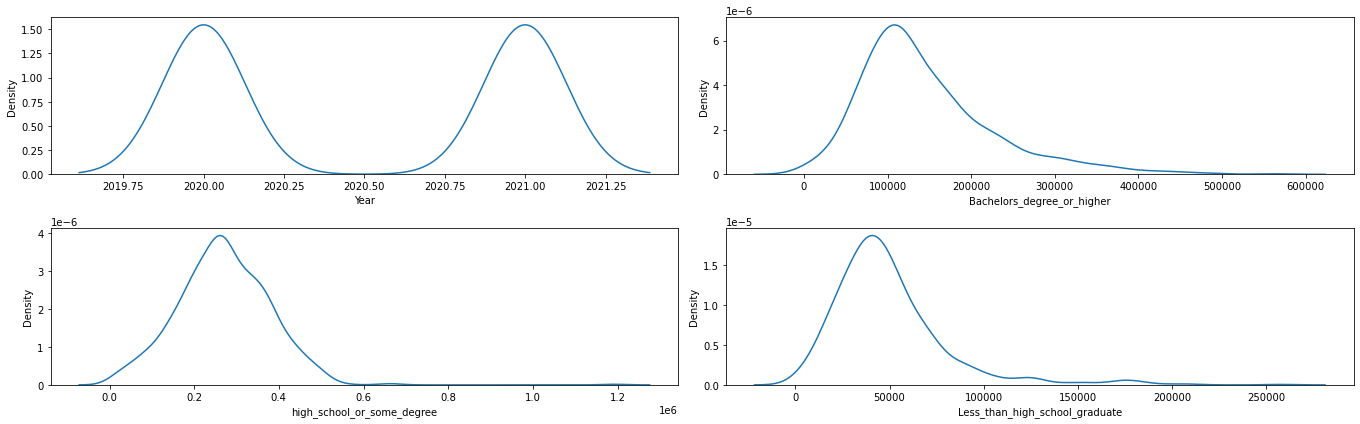

In [39]:
#grab the numeric columns from education_df
education_numeric_columns = education_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

#set a plot and multiple axes
fig, ax = plt.subplots(2,2,figsize=(19,6))
ax = ax.flatten()

#iterate over the numeric columns and plot distribution curves
for i, j in enumerate(education_numeric_columns):
    sns.kdeplot(education_df[j],ax=ax[i]);

plt.tight_layout()
plt.show()

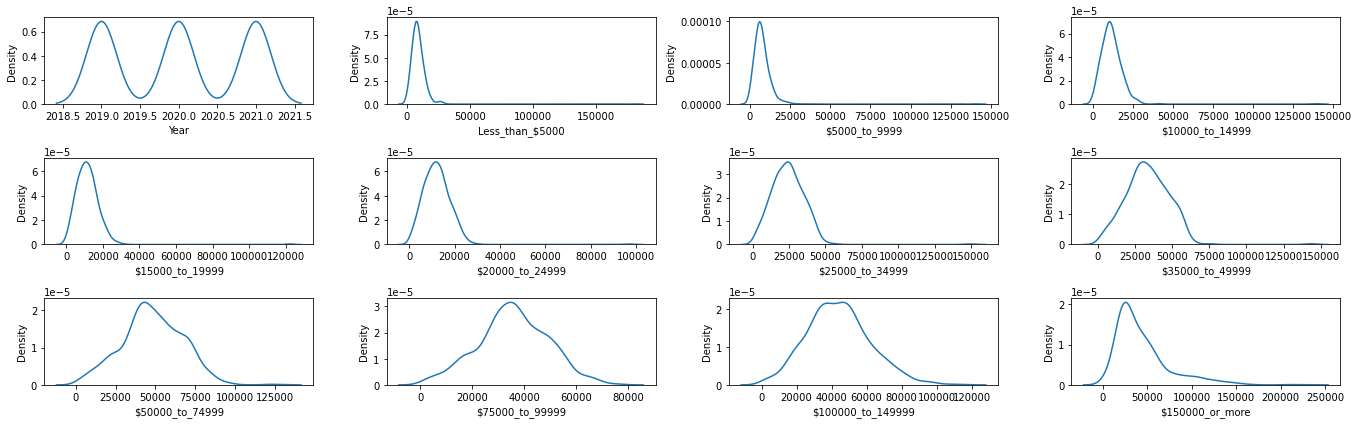

In [40]:
#grab numeric columns from finance_df
finance_numeric_columns = finance_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

#set a plot and multiple axes
fig, ax = plt.subplots(3,4,figsize=(19,6))
ax = ax.flatten()

#iterate over the numeric columns and plot distribution curves
for i, j in enumerate(finance_numeric_columns):
    sns.kdeplot(finance_df[j],ax=ax[i]);

plt.tight_layout()
plt.show()

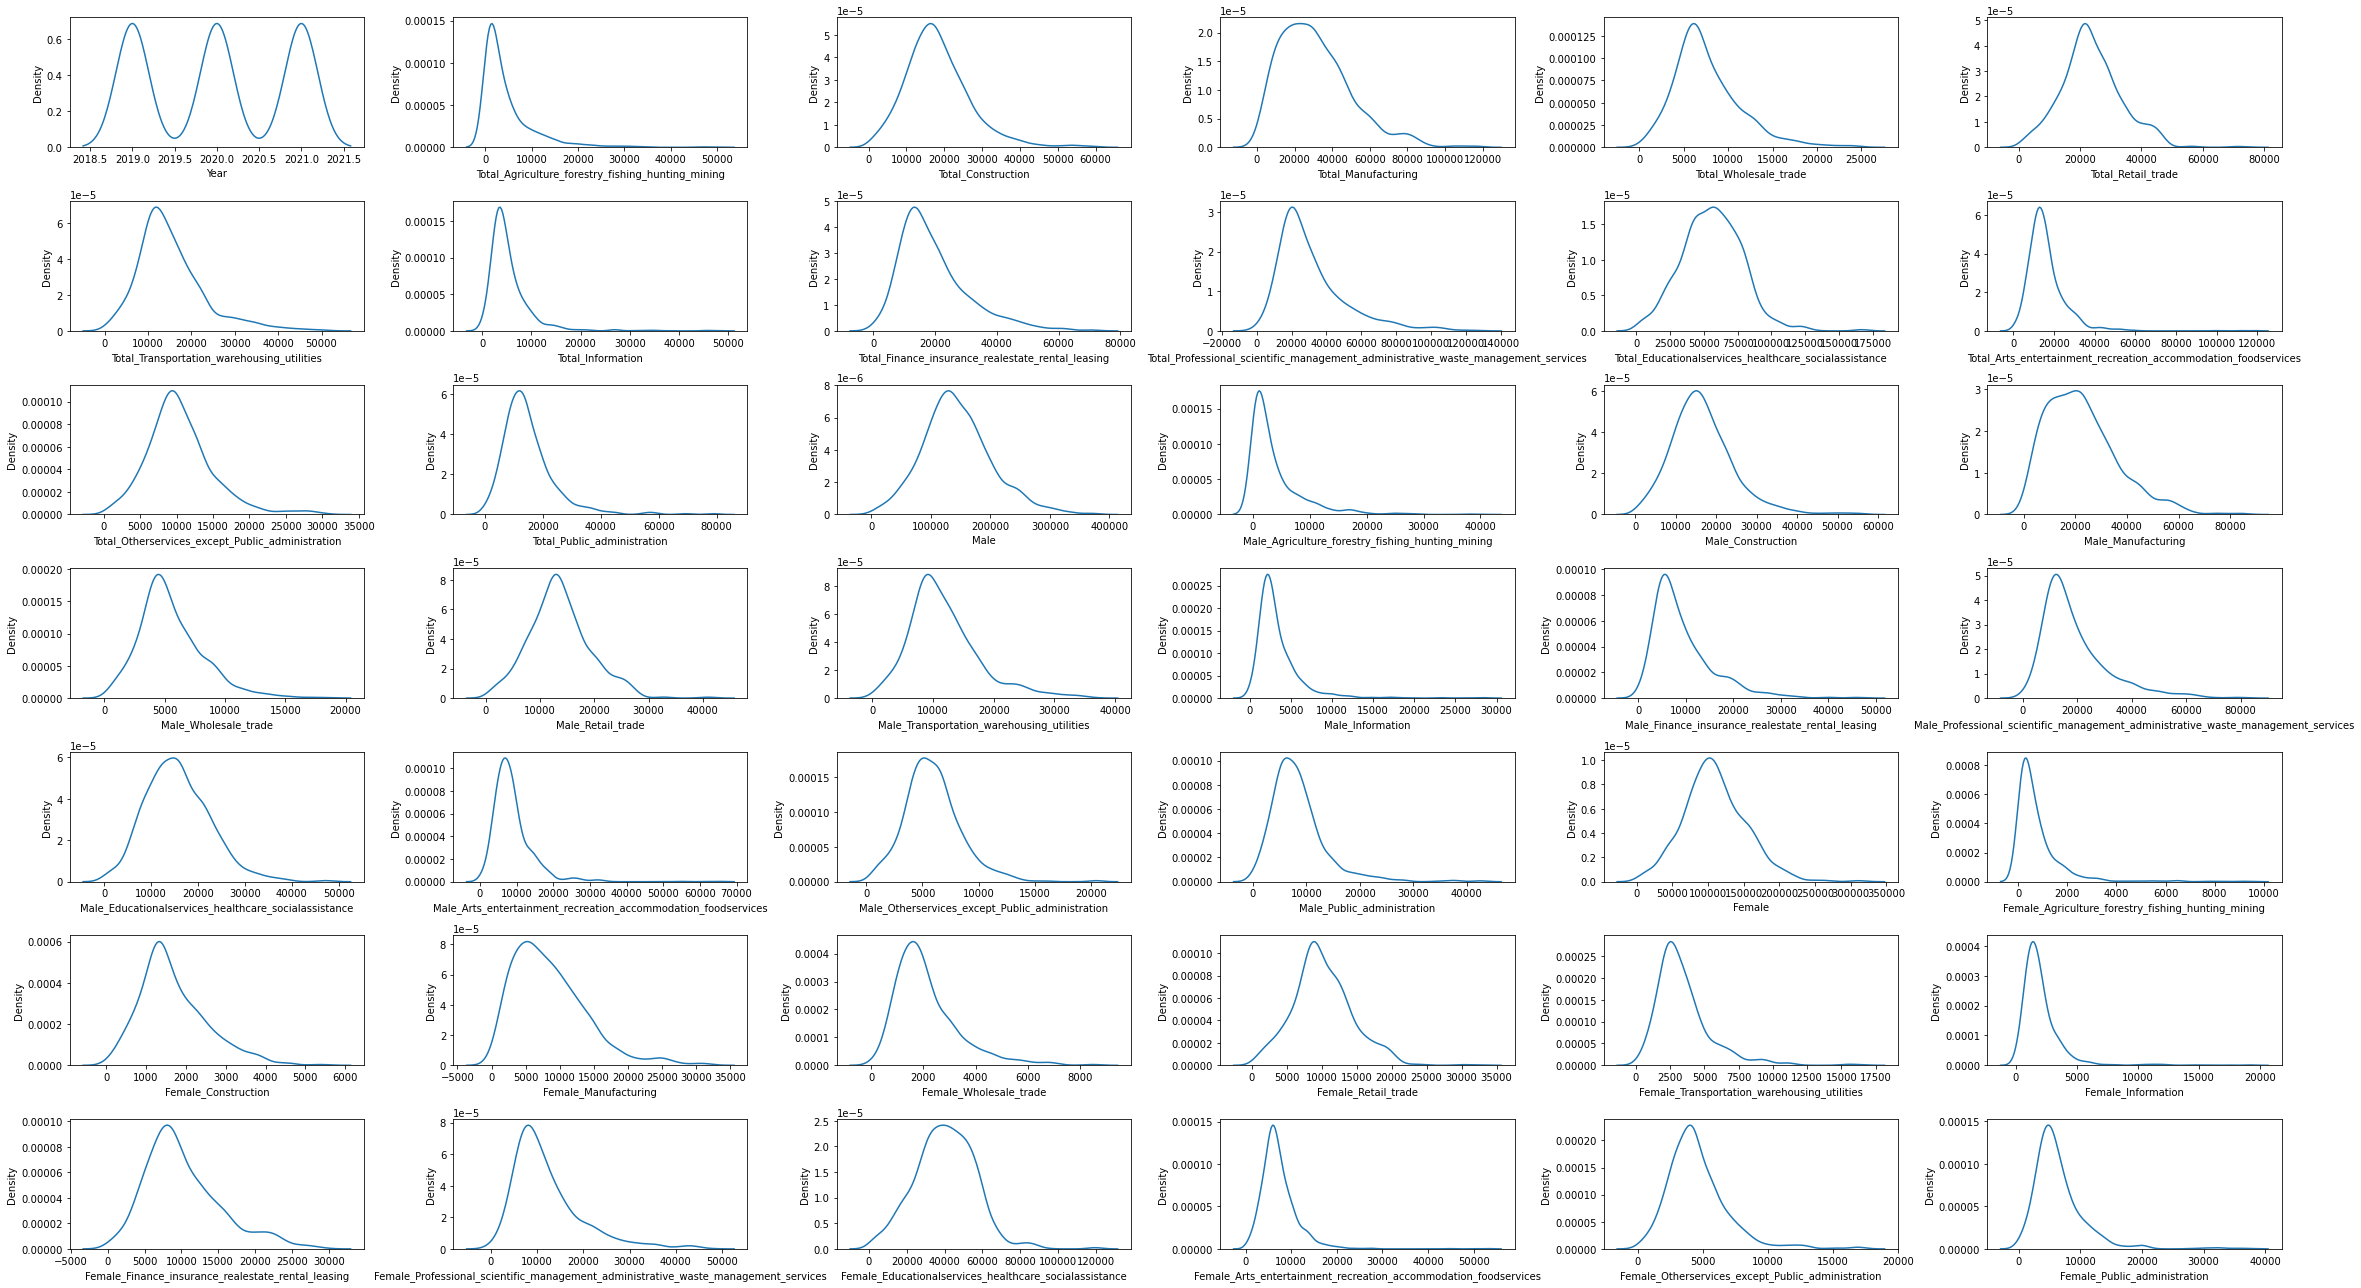

In [41]:
#grab numeric columns from industry_df
industry_numeric_columns = industry_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

#set a plot and multiple axes
fig, ax = plt.subplots(7,6,figsize=(32,18))
ax = ax.flatten()

#iterate over the numeric columns and plot distribution curves
for i, j in enumerate(industry_numeric_columns):
    sns.kdeplot(industry_df[j],ax=ax[i]);

plt.tight_layout()
plt.show()

### Box-Cox
We proceed to normalize the data using box-cox.

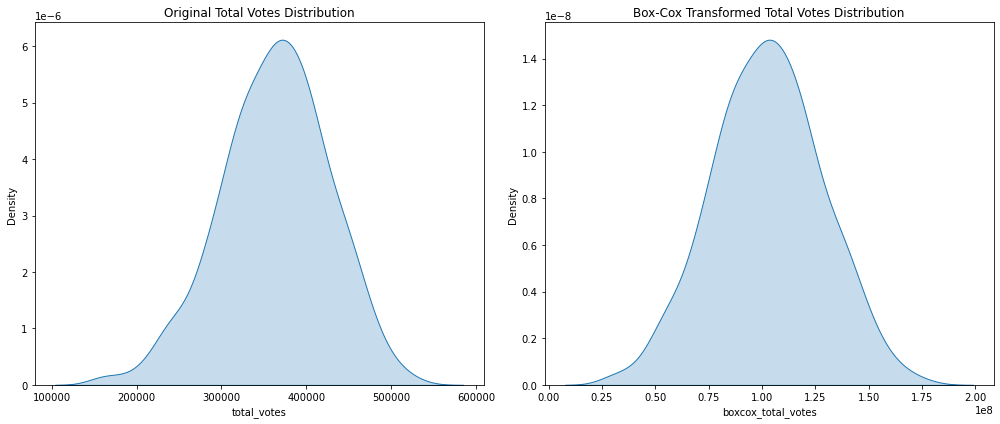

In [42]:
#copy the dataframe for normalization efforts
normal_df = pd.DataFrame(political_df)

#add a constant to ensure all values are positive
normal_df['total_votes'] = normal_df['total_votes'] + 1 

#apply Box-Cox transformation
normal_df['boxcox_total_votes'], fitted_lambda = stats.boxcox(normal_df['total_votes'])

# Plot original and Box-Cox transformed data
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.kdeplot(political_df['total_votes'], ax=axes[0], shade=True)
axes[0].set_title('Original Total Votes Distribution')
sns.kdeplot(normal_df['boxcox_total_votes'], ax=axes[1], shade=True)
axes[1].set_title('Box-Cox Transformed Total Votes Distribution')

plt.tight_layout()
plt.show()

### Target Column
We create the 'winner' column to be used for further analysis and as our target for modeling.

In [43]:
#set the 'winner' column in political_df
for index, row in political_df.iterrows():
    if row['d_percent'] > row['r_percent']:
        political_df.at[index, 'winner'] = 'democrat'
    elif row['r_percent'] > row['d_percent']:
        political_df.at[index, 'winner'] = 'republican'
    else:
        political_df.at[index, 'winner'] = 'neither'

In [44]:
#view sample rows 
political_df.head(10)

,Year,district,d_percent,r_percent,other_percent,total_votes,Bachelors_degree_or_higher,high_school_or_some_degree,Less_than_high_school_graduate,Less_than_$5000,...,Female_Transportation_warehousing_utilities,Female_Information,Female_Finance_insurance_realestate_rental_leasing,Female_Professional_scientific_management_administrative_waste_management_services,Female_Educationalservices_healthcare_socialassistance,Female_Arts_entertainment_recreation_accommodation_foodservices,Female_Otherservices_except_Public_administration,Female_Public_administration,boxcox_total_votes,winner
0,2020,AK-00,42.77,52.83,4.40,359531.0,121098,309698,33572,5949,...,5645,1726,5924,7889,35809,6225,3715,14619,9.994662e+07,republican
1,2020,AL-01,35.19,63.53,1.28,332778.0,96025,250831,44764,10004,...,2347,889,7997,8812,36343,7015,4551,5038,8.920763e+07,republican
2,2020,AL-02,34.62,64.16,1.22,307432.0,109032,333132,69141,14763,...,4145,1384,8717,8803,43616,7720,4445,12631,7.940080e+07,republican
3,2020,AL-03,34.08,64.67,1.25,325632.0,77833,267634,49575,13068,...,2270,1026,7766,5546,34563,4949,3362,4704,8.640587e+07,republican
4,2020,AL-04,17.87,80.96,1.17,321471.0,69353,295273,67001,9793,...,2952,981,5745,5551,36535,5555,3076,4866,8.478768e+07,republican
5,2020,AL-05,35.63,62.47,1.90,365611.0,118293,199894,36396,6636,...,1969,1678,4729,11305,27309,4624,2593,7612,1.024411e+08,republican
6,2020,AL-06,31.42,66.69,1.89,372835.0,200747,369353,60132,14144,...,5694,3285,19878,14576,59392,8865,6104,8078,1.054304e+08,republican
7,2020,AL-07,70.55,28.31,1.14,298713.0,55728,198658,32083,9456,...,1700,561,4647,3102,27145,3563,2410,3648,7.611266e+07,democrat
8,2020,AR-01,27.93,69.06,3.01,271713.0,95999,398584,69560,14442,...,4600,1380,9503,6984,54978,6705,4354,9332,6.621776e+07,republican
9,2020,AR-02,44.26,53.11,2.63,333348.0,105763,196882,23807,8516,...,2486,2142,7453,7980,37493,4898,3284,5988,8.943234e+07,republican


In [45]:
#view sample rows where 'democrat' is the winner
political_df[political_df['winner'] == 'democrat'].head(10)

,Year,district,d_percent,r_percent,other_percent,total_votes,Bachelors_degree_or_higher,high_school_or_some_degree,Less_than_high_school_graduate,Less_than_$5000,...,Female_Transportation_warehousing_utilities,Female_Information,Female_Finance_insurance_realestate_rental_leasing,Female_Professional_scientific_management_administrative_waste_management_services,Female_Educationalservices_healthcare_socialassistance,Female_Arts_entertainment_recreation_accommodation_foodservices,Female_Otherservices_except_Public_administration,Female_Public_administration,boxcox_total_votes,winner
7,2020,AL-07,70.55,28.31,1.14,298713.0,55728,198658,32083,9456,...,1700,561,4647,3102,27145,3563,2410,3648,7.611266e+07,democrat
12,2020,AZ-01,50.11,48.36,1.53,373580.0,238202,283685,48500,11733,...,4052,2650,22948,22405,45945,10077,6700,6209,1.057402e+08,democrat
13,2020,AZ-02,54.52,43.89,1.59,391437.0,120696,462767,92311,18896,...,4050,1780,11346,10014,50818,11402,4597,12660,1.132530e+08,democrat
14,2020,AZ-03,62.79,35.74,1.47,278498.0,24685,110656,58520,4033,...,2133,580,4166,5479,11815,4224,1871,2554,6.866271e+07,democrat
18,2020,AZ-07,73.66,24.73,1.61,224169.0,16291,67774,19086,2564,...,952,237,1824,2513,7806,1167,808,2075,4.990865e+07,democrat
20,2020,AZ-09,60.79,37.34,1.87,368799.0,129242,488434,124233,14379,...,6968,1952,19182,14797,55848,12609,6080,11174,1.037569e+08,democrat
22,2020,CA-02,73.52,23.88,2.60,400546.0,236979,353070,70389,10620,...,3126,3871,11526,19205,44063,11364,8406,9004,1.171483e+08,democrat
23,2020,CA-03,54.89,42.64,2.47,327562.0,214017,397623,48507,10293,...,4184,2039,17538,16665,49027,9963,6414,16351,8.715975e+07,democrat
25,2020,CA-05,72.43,25.26,2.31,364625.0,153229,487303,122054,10699,...,4751,1924,10487,11715,56265,9546,5733,11272,1.020352e+08,democrat
26,2020,CA-06,70.24,27.22,2.54,320644.0,96816,236822,40311,6502,...,3735,1125,8701,9988,27354,5318,3417,11571,8.446723e+07,democrat


In [46]:
#check there are only two 'winner' values
political_df['winner'].unique()

array(['republican', 'democrat'], dtype=object)

### Swing District

We create a column that determines whether a district is a swing district based on if the results were within 9 points between parties. This is applied to both our election and fully merged datasets and will be used for deeper analysis.

In [47]:
#create 'swing_district' column in election_df
for index, row in election_df.iterrows():
    if abs(row['d_percent'] - row['r_percent']) <= 9:
        election_df.at[index, 'swing_district'] = 'yes'
    else:
        election_df.at[index, 'swing_district'] = 'no'

In [48]:
#view sample rows
election_df.head(20)

,Year,district,d_percent,r_percent,other_percent,total_votes,state,swing_district
0,1952,AL-01,57.76,42.24,0.0,45915.0,AL,no
1,1952,AL-02,63.19,36.81,0.0,48972.0,AL,no
2,1952,AL-03,72.23,27.77,0.0,36062.0,AL,no
3,1952,AL-04,64.14,35.86,0.0,41456.0,AL,no
4,1952,AL-05,72.69,27.31,0.0,55867.0,AL,no
5,1952,AL-06,61.27,38.73,0.0,31041.0,AL,no
6,1952,AL-07,62.58,37.42,0.0,46803.0,AL,no
7,1952,AL-08,79.55,20.45,0.0,48313.0,AL,no
8,1952,AL-09,54.16,45.84,0.0,70365.0,AL,yes
9,1952,AR-01,60.83,39.17,0.0,60089.0,AR,no


In [49]:
#view total swing and non-swing districts
print('Total Swing Districts: ', (election_df['swing_district'] == 'yes').sum())
print('Total Non-Swing Districts: ', (election_df['swing_district'] == 'no').sum())

Total Swing Districts:  1969
Total Non-Swing Districts:  5867


In [50]:
#view total swing and non-swing districts post 2000
print('Total Swing Districts post 2000: ', (election_df[(election_df['swing_district'] == 'yes') & (election_df['Year'] >= 2000)].shape[0]))
print('Total Non-Swing Districts post 2000: ', (election_df[(election_df['swing_district'] == 'no') & (election_df['Year'] >= 2000)].shape[0]))

Total Swing Districts post 2000:  553
Total Non-Swing Districts post 2000:  2063


In [51]:
#create 'swing_district' column in political_df
for index, row in political_df.iterrows():
    if abs(row['d_percent'] - row['r_percent']) <= 9:
        political_df.at[index, 'swing_district'] = 'yes'
    else:
        political_df.at[index, 'swing_district'] = 'no'

In [52]:
#view sample rows
political_df.head(20)

,Year,district,d_percent,r_percent,other_percent,total_votes,Bachelors_degree_or_higher,high_school_or_some_degree,Less_than_high_school_graduate,Less_than_$5000,...,Female_Information,Female_Finance_insurance_realestate_rental_leasing,Female_Professional_scientific_management_administrative_waste_management_services,Female_Educationalservices_healthcare_socialassistance,Female_Arts_entertainment_recreation_accommodation_foodservices,Female_Otherservices_except_Public_administration,Female_Public_administration,boxcox_total_votes,winner,swing_district
0,2020,AK-00,42.77,52.83,4.40,359531.0,121098,309698,33572,5949,...,1726,5924,7889,35809,6225,3715,14619,9.994662e+07,republican,no
1,2020,AL-01,35.19,63.53,1.28,332778.0,96025,250831,44764,10004,...,889,7997,8812,36343,7015,4551,5038,8.920763e+07,republican,no
2,2020,AL-02,34.62,64.16,1.22,307432.0,109032,333132,69141,14763,...,1384,8717,8803,43616,7720,4445,12631,7.940080e+07,republican,no
3,2020,AL-03,34.08,64.67,1.25,325632.0,77833,267634,49575,13068,...,1026,7766,5546,34563,4949,3362,4704,8.640587e+07,republican,no
4,2020,AL-04,17.87,80.96,1.17,321471.0,69353,295273,67001,9793,...,981,5745,5551,36535,5555,3076,4866,8.478768e+07,republican,no
5,2020,AL-05,35.63,62.47,1.90,365611.0,118293,199894,36396,6636,...,1678,4729,11305,27309,4624,2593,7612,1.024411e+08,republican,no
6,2020,AL-06,31.42,66.69,1.89,372835.0,200747,369353,60132,14144,...,3285,19878,14576,59392,8865,6104,8078,1.054304e+08,republican,no
7,2020,AL-07,70.55,28.31,1.14,298713.0,55728,198658,32083,9456,...,561,4647,3102,27145,3563,2410,3648,7.611266e+07,democrat,no
8,2020,AR-01,27.93,69.06,3.01,271713.0,95999,398584,69560,14442,...,1380,9503,6984,54978,6705,4354,9332,6.621776e+07,republican,no
9,2020,AR-02,44.26,53.11,2.63,333348.0,105763,196882,23807,8516,...,2142,7453,7980,37493,4898,3284,5988,8.943234e+07,republican,yes


In [53]:
#create dataframe of of swing districts in 1952 and in 2020
swing_districts_1952 = election_df[(election_df['Year'] == 1952) & (election_df['swing_district'] == 'yes')]
swing_districts_2020 = election_df[(election_df['Year'] == 2020) & (election_df['swing_district'] == 'yes')]

#merge the swing districts that are present in both elections
swing_districts_both_years = swing_districts_1952.merge(swing_districts_2020, on='district')

#display results
swing_districts_both_years

,Year_x,district,d_percent_x,r_percent_x,other_percent_x,total_votes_x,state_x,swing_district_x,Year_y,d_percent_y,r_percent_y,other_percent_y,total_votes_y,state_y,swing_district_y
0,1952,NC-08,51.09,48.91,0.0,116991.0,NC,yes,2020,45.60,53.04,1.36,390839.0,NC,yes
1,1952,NJ-11,46.88,53.12,0.0,131462.0,NJ,yes,2020,52.46,45.86,1.68,453555.0,NJ,yes
2,1952,TX-03,49.26,50.74,0.0,74135.0,TX,yes,2020,48.58,49.62,1.80,432029.0,TX,yes
3,1952,TX-07,54.47,45.53,0.0,57385.0,TX,yes,2020,53.55,45.09,1.36,317565.0,TX,yes
4,1952,TX-10,50.76,49.24,0.0,77787.0,TX,yes,2020,48.35,49.98,1.67,421768.0,TX,yes
5,1952,VA-01,47.78,52.22,0.0,52692.0,VA,yes,2020,46.87,51.27,1.86,454745.0,VA,yes
6,1952,VA-02,52.05,47.95,0.0,51097.0,VA,yes,2020,51.14,46.68,2.18,361515.0,VA,yes
7,1952,VA-05,46.36,53.64,0.0,55216.0,VA,yes,2020,44.97,53.41,1.62,407348.0,VA,yes
8,1952,WA-03,46.22,53.78,0.0,147363.0,WA,yes,2020,46.56,50.30,3.14,426189.0,WA,yes


### Swing Districts Graph 
This graph displays the election history of modern day swing districts.

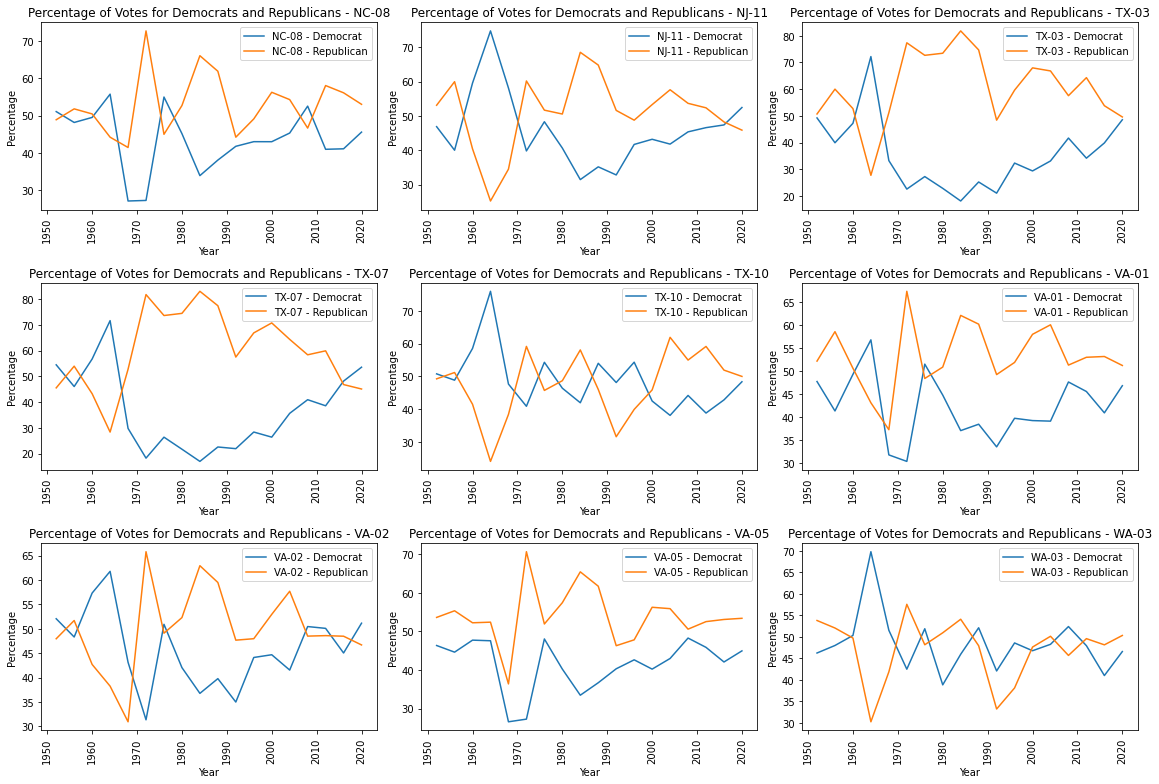

In [54]:
#filter the original election_df DataFrame for the districts in_districts_both_years
districts = swing_districts_both_years['district'].unique()

#calculate the number of rows and columns for the subplot grid
num_districts = len(districts)
num_cols = math.ceil(math.sqrt(num_districts))
num_rows = math.ceil(num_districts / num_cols)

#create subplots for each district
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 11))

#flatten the axs array if necessary
if num_districts == 1:
    axs = [axs]

#plot a separate graph for each district
for i, district in enumerate(districts):
    district_data = election_df[election_df['district'] == district]
    ax = axs[i // num_cols, i % num_cols]
    ax.plot(district_data['Year'], district_data['d_percent'], label=f'{district} - Democrat')
    ax.plot(district_data['Year'], district_data['r_percent'], label=f'{district} - Republican')
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Percentage of Votes for Democrats and Republicans - {district}')
    ax.legend()
    ax.tick_params(axis='x', rotation=90)

#remove empty subplots if necessary
if num_districts < num_rows * num_cols:
    for i in range(num_districts, num_rows * num_cols):
        fig.delaxes(axs[i // num_cols, i % num_cols])

#display results 
plt.tight_layout()
plt.show()

### Total Votes by Party
Here, we add a column that displays each party's total votes in election_df and political_df.

In [55]:
#create 'total_votes' columns by party and display sample rows in election_df
election_df['r_total_votes'] = election_df['r_percent'] * .01 * election_df['total_votes']
election_df['r_total_votes'] = election_df['r_total_votes'].astype(int)
election_df['d_total_votes'] = election_df['d_percent'] * .01 * election_df['total_votes']
election_df['d_total_votes'] = election_df['d_total_votes'].astype(int)
election_df.head()

,Year,district,d_percent,r_percent,other_percent,total_votes,state,swing_district,r_total_votes,d_total_votes
0,1952,AL-01,57.76,42.24,0.0,45915.0,AL,no,19394,26520
1,1952,AL-02,63.19,36.81,0.0,48972.0,AL,no,18026,30945
2,1952,AL-03,72.23,27.77,0.0,36062.0,AL,no,10014,26047
3,1952,AL-04,64.14,35.86,0.0,41456.0,AL,no,14866,26589
4,1952,AL-05,72.69,27.31,0.0,55867.0,AL,no,15257,40609


In [56]:
#create 'total_votes' columns by party and display sample rows in political_df
political_df['r_total_votes'] = political_df['r_percent'] * .01 * political_df['total_votes']
political_df['r_total_votes'] = political_df['r_total_votes'].astype(int)
political_df['d_total_votes'] = political_df['d_percent'] * .01 * political_df['total_votes']
political_df['d_total_votes'] = political_df['d_total_votes'].astype(int)
political_df.head()

,Year,district,d_percent,r_percent,other_percent,total_votes,Bachelors_degree_or_higher,high_school_or_some_degree,Less_than_high_school_graduate,Less_than_$5000,...,Female_Professional_scientific_management_administrative_waste_management_services,Female_Educationalservices_healthcare_socialassistance,Female_Arts_entertainment_recreation_accommodation_foodservices,Female_Otherservices_except_Public_administration,Female_Public_administration,boxcox_total_votes,winner,swing_district,r_total_votes,d_total_votes
0,2020,AK-00,42.77,52.83,4.40,359531.0,121098,309698,33572,5949,...,7889,35809,6225,3715,14619,9.994662e+07,republican,no,189940,153771
1,2020,AL-01,35.19,63.53,1.28,332778.0,96025,250831,44764,10004,...,8812,36343,7015,4551,5038,8.920763e+07,republican,no,211413,117104
2,2020,AL-02,34.62,64.16,1.22,307432.0,109032,333132,69141,14763,...,8803,43616,7720,4445,12631,7.940080e+07,republican,no,197248,106432
3,2020,AL-03,34.08,64.67,1.25,325632.0,77833,267634,49575,13068,...,5546,34563,4949,3362,4704,8.640587e+07,republican,no,210586,110975
4,2020,AL-04,17.87,80.96,1.17,321471.0,69353,295273,67001,9793,...,5551,36535,5555,3076,4866,8.478768e+07,republican,no,260262,57446


### State Election Results

We created a dataframe grouping the election results by state for analysis, including examination of each state's share of the national vote.

In [57]:
#group election_df by state into new dataframe
state_election_df = election_df.groupby(['state', 'Year']).agg({
    'total_votes': 'sum',
    'd_percent': 'mean',
    'r_percent': 'mean',
    'r_total_votes': 'sum',
    'd_total_votes': 'sum'
}).reset_index()

In [58]:
#create 'national_percent' column in state_election_df
state_election_df['national_percent'] = state_election_df['total_votes'] / state_election_df.groupby('Year')['total_votes'].transform('sum')

In [59]:
#view sample rows in California
state_election_df[state_election_df['state'] == 'CA'].head(18)

,state,Year,total_votes,d_percent,r_percent,r_total_votes,d_total_votes,national_percent
70,CA,1952,5022476.0,42.978333,57.021667,2846212,2176234,0.076843
71,CA,1956,5378511.0,44.806667,55.193333,2977696,2400785,0.081644
72,CA,1960,5622012.0,50.409333,49.590667,2800272,2821711,0.082788
73,CA,1964,7027389.0,60.254211,39.745789,2840172,4187181,0.101577
74,CA,1968,7056629.0,46.778684,46.407632,3379759,3195513,0.097731
75,CA,1972,8056796.0,43.571395,56.428605,4590299,3466454,0.105934
76,CA,1976,7591811.0,50.485581,49.514419,3861052,3730716,0.095371
77,CA,1980,8346967.0,39.174186,52.207907,4523470,3083172,0.098084
78,CA,1984,9389472.0,42.800000,57.200000,5466956,3922471,0.101948
79,CA,1988,9757150.0,49.707556,50.292444,5054920,4702185,0.107330


In [60]:
#display modern day swing states
print("Modern Day Swing States: ")
swing_states = []

#filter the dataframe for years starting from 2000 onwards
state_filtered_df = state_election_df[state_election_df['Year'] >= 2000]

#group the filtered dataframe by 'state' and check the conditions for swing states
for state, group in state_filtered_df.groupby('state'):
    if any(group['d_total_votes'] > group['r_total_votes']) and any(group['d_total_votes'] < group['r_total_votes']):
        swing_states.append(state)
for state in swing_states:
    print(state)
print("Number of Swing States:",len(swing_states))

Modern Day Swing States: 
AZ
CO
FL
GA
IA
IN
MI
NC
NH
NM
NV
OH
PA
VA
WI
Number of Swing States: 15


### Swing States Election Results
This graph displays the election results by party for each swing state over the years.

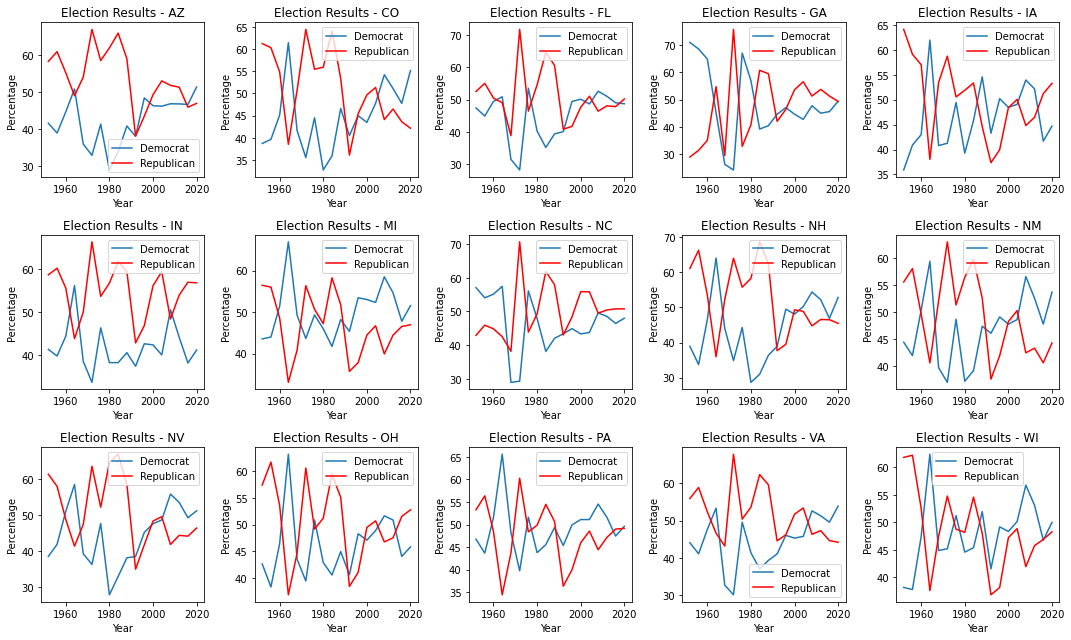

In [61]:
#get number of swing states
num_states = len(swing_states)

#calculate the number of rows and columns for the subplot grid
num_cols = 5
num_rows = (num_states + num_cols - 1) // num_cols

#create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))

#iterate over states and plot on each subplot
for i, state in enumerate(swing_states):
    state_df = state_election_df[state_election_df['state'] == state]

    row = i // num_cols
    col = i % num_cols

    axes[row, col].plot(state_df['Year'], state_df['d_percent'], label='Democrat')
    axes[row, col].plot(state_df['Year'], state_df['r_percent'], label='Republican', color='red')
    #axes[row, col].plot(state_election_df['Year'], state_election_df['other_percent'], label='Third Party')

    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_title(f'Election Results - {state}')
    axes[row, col].legend()

#display results
plt.tight_layout()
plt.show()

In [62]:
#create dataframe of election data post 2000
modern_election_df = election_df[election_df['Year'] >= 2000]
modern_election_df.head()

,Year,district,d_percent,r_percent,other_percent,total_votes,state,swing_district,r_total_votes,d_total_votes
5222,2000,AK-00,27.67,58.62,13.71,285560.0,AK,no,167395,79014
5223,2000,AL-01,37.75,60.17,2.08,233974.0,AL,no,140782,88325
5224,2000,AL-02,35.53,62.92,1.55,231428.0,AL,no,145614,82226
5225,2000,AL-03,41.30,56.79,1.91,222458.0,AL,no,126333,91875
5226,2000,AL-04,38.90,59.25,1.85,232673.0,AL,no,137858,90509


In [63]:
#print whether each district is a swing district for every swing state
for state in swing_states:
    print('\n')
    print(f"{state} districts: ")
    for index, row in modern_election_df.iterrows():
        if row['Year'] == 2020 and row['state'] == state:
            print(f"{row['district']}: {row['swing_district']} swing district")



AZ districts: 
AZ-01: yes swing district
AZ-02: no swing district
AZ-03: no swing district
AZ-04: no swing district
AZ-05: no swing district
AZ-06: yes swing district
AZ-07: no swing district
AZ-08: no swing district
AZ-09: no swing district


CO districts: 
CO-01: no swing district
CO-02: no swing district
CO-03: yes swing district
CO-04: no swing district
CO-05: no swing district
CO-06: no swing district
CO-07: no swing district


FL districts: 
FL-01: no swing district
FL-02: no swing district
FL-03: no swing district
FL-04: no swing district
FL-05: no swing district
FL-06: no swing district
FL-07: no swing district
FL-08: no swing district
FL-09: yes swing district
FL-10: no swing district
FL-11: no swing district
FL-12: no swing district
FL-13: yes swing district
FL-14: no swing district
FL-15: yes swing district
FL-16: yes swing district
FL-17: no swing district
FL-18: yes swing district
FL-19: no swing district
FL-20: no swing district
FL-21: no swing district
FL-22: no swing 

## Processing
In this section, we proceed to create a model to predict the winning party by congressional district.

### Train Test Split
We set up our data for a train_test_split.

In [64]:
#assign X and y from political_df columns
X = political_df.drop(['winner', 'Year', 'district', 'd_percent', 'r_percent', 'swing_district'], axis=1)
y = political_df['winner']

### Standard Scaler
We scaled the data for modeling.

In [65]:
#create an instance of the StandardScaler
scaler = StandardScaler()

#scale the numerical features
X_scaled = scaler.fit_transform(X)

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### Model
We used logistic regression for our binary model.

In [66]:
#instantiate LogisticRegression
model = LogisticRegression()

#fit the model onto the data
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
#assign predictions
y_pred = model.predict(X_test)

#assign accuracy score
accuracy = accuracy_score(y_test, y_pred)

#print results
print("Accuracy:", accuracy)

Accuracy: 0.9844961240310077


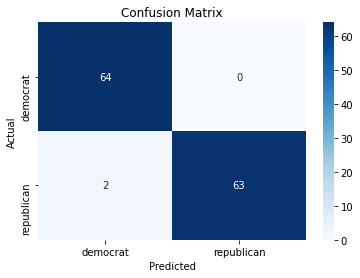

In [68]:
#calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#create a figure and axes
fig, ax = plt.subplots()

#create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

#set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['democrat', 'republican'])
ax.yaxis.set_ticklabels(['democrat', 'republican'])

#show the plot
plt.show()

### Accuracy Scores
We checked the training and testing accuracy to see if there were any issues with overfitting, and it seemed okay.

In [69]:
#find the train prediction
y_train_pred = model.predict(X_train)


#performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

#print results to check for fitting
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9966555183946488
Test Accuracy: 0.9844961240310077


### Cross-Validation
We ran a cross-validation with 5 folds to further assess the performance of the model. The results were quite good. 

In [70]:
#5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  

#display results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [1.         1.         0.97674419 0.97647059 0.97647059]
Mean Cross-Validation Score: 0.98593707250342


/Users/Chris/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Chris/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

### Metrics

We took a look at the Recall, Precision, and F1 scores for the training and test data, and were please with the results.

In [71]:
#Training metrics
train_precision = precision_score(y_train, y_train_pred, pos_label='republican')
train_recall = recall_score(y_train, y_train_pred, pos_label='republican')
train_f1 = f1_score(y_train, y_train_pred, pos_label='republican')

#Test metrics
test_precision = precision_score(y_test, y_pred, pos_label='republican')
test_recall = recall_score(y_test, y_pred, pos_label='republican')
test_f1 = f1_score(y_test, y_pred, pos_label='republican')

#display results for training metrics
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-Score:", train_f1)

#display results for test metrics
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1)

Training Precision: 0.9929577464788732
Training Recall: 1.0
Training F1-Score: 0.9964664310954063
Test Precision: 1.0
Test Recall: 0.9692307692307692
Test F1-Score: 0.9843749999999999


### Learning Curve
We plotted a learning curve. Given the constant perfect score of the training set, there's likely some overfitting happening. We will proceed with regularization techniques. 

/Users/Chris/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Chris/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Chris/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1372, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'democrat'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/Chris/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to 

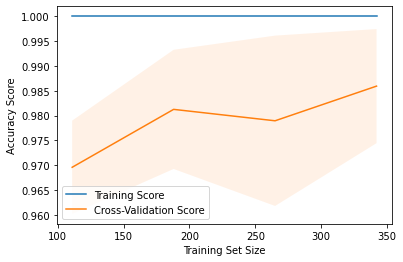

In [72]:
#create a learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

#calculate mean and standard deviation
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

#plot learning curves
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

## Conclusions

## Next Steps